# User behavior analysis

**Goal**   
Determine the players behavior in the game "Space brothers" and the correlation between this behavior and the sources of user engagement in order to plan and optimize an advertising campaign.

**Plan**   
1. Review and descriptive analysis
1. Data preprocessing
1. Data augmentation
1. User portraits
1. Hypothesis verification 
1. Conclusion
1. Dashboards
1. Presentation of the results

## Attached content

**[Presentation](https://github.com/Rikka-irk/Data-Analysis/blob/main/Game%20project/'Cosmic%20brothers'%20users%20behaviour%20analysis.pdf)**


**[Dashboard](https://public.tableau.com/app/profile/rikka.ya/viz/CosmicBrothers_16688971849250/BuildingsDistributionDashboard?publish=yes)**

## Data review

Importing necessary libraries

In [254]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import math as mth

Reading data from the file

In [255]:
try: 
    ad_costs = pd.read_csv('https://raw.githubusercontent.com/Rikka-irk/Data-Analysis/main/Game%20project/ad_costs.csv')
    game_actions = pd.read_csv('https://raw.githubusercontent.com/Rikka-irk/Data-Analysis/main/Game%20project/game_actions.csv')
    user_source = pd.read_csv('https://raw.githubusercontent.com/Rikka-irk/Data-Analysis/main/Game%20project/user_source.csv')
    
except: 
    print('File reading error. Check the URLs')

### Describing the data

**Advertising costs**

- `day` - the day when user clicked on the ad
- `source` - the source of traffic
- `cost` - cost of the clicks

In [256]:
ad_costs.sample(10).sort_values('day')

,source,day,cost
14,yandex_direct,2020-05-03,969.139394
21,youtube_channel_reklama,2020-05-03,454.224943
1,facebook_ads,2020-05-04,548.354480
9,instagram_new_adverts,2020-05-05,313.970984
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
25,youtube_channel_reklama,2020-05-07,55.740645
18,yandex_direct,2020-05-07,114.429338
4,facebook_ads,2020-05-07,111.766796
19,yandex_direct,2020-05-08,62.961630


In [257]:
ad_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  28 non-null     object 
 1   day     28 non-null     object 
 2   cost    28 non-null     float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes


**Players actions in the game**

- `event_datetime` — the time of an action
- `event` — one of the three actions:
    - `building` — an object was built
    - `finished_stage_1` — the first level completed
    - `project` — a project completed
- `building_type` — one of the three buildings:
    - `assembly_shop` — an assembly shop
    - `spaceport` — a spaceport
    - `research_center` — a research centre
- `user_id` — user Identifier
- `project_type` — the type of the completed project

In [258]:
game_actions.sample(10).sort_values('event_datetime')

,event_datetime,event,building_type,user_id,project_type
15740,2020-05-05 20:02:36,building,assembly_shop,2be04e68-bbc4-4af2-a424-5345e61ee6ee,NaN
30490,2020-05-07 07:30:11,building,assembly_shop,d43ea132-d163-4565-9e3e-5a783d46c80d,NaN
34311,2020-05-07 15:55:07,building,assembly_shop,c4d5c96e-e7c3-4c62-bdd7-789a5212841d,NaN
34359,2020-05-07 16:02:26,building,assembly_shop,6a0347d6-6af8-4532-b0f5-9b5ab2744591,NaN
88577,2020-05-12 05:59:28,building,spaceport,4be5cf61-e7f7-47b4-be53-01e818d6f9b7,NaN
102371,2020-05-14 00:44:13,building,spaceport,a94a14d2-d468-442a-95ef-4250ae822e77,NaN
117559,2020-05-16 11:44:09,building,spaceport,fd8e7a0e-6b4d-437e-b082-800ae86e8b71,NaN
120769,2020-05-17 03:52:46,building,research_center,b500383c-de34-4fe7-bbb5-42da969b09cb,NaN
126116,2020-05-18 17:30:56,building,research_center,e6a840a6-ccfc-458d-b885-01a445e6c354,NaN
129690,2020-05-20 06:20:44,building,spaceport,75d783cb-590a-4bd8-9159-cc25417c9a25,NaN


In [259]:
game_actions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135639 entries, 0 to 135638
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  135639 non-null  object
 1   event           135639 non-null  object
 2   building_type   127956 non-null  object
 3   user_id         135639 non-null  object
 4   project_type    1866 non-null    object
dtypes: object(5)
memory usage: 5.2+ MB


In [260]:
print('Event types')
display(game_actions.event.unique().tolist())

Event types


['building', 'finished_stage_1', 'project']

In [261]:
print('Building types')
display(game_actions.building_type.unique().tolist())

Building types


['assembly_shop', 'spaceport', nan, 'research_center']

In [262]:
print('Project types')
display(game_actions.project_type.unique().tolist())

Project types


[nan, 'satellite_orbital_assembly']

**Players by sources**

- `user_id` - player identifier
- `source` - traffic source of a player

In [263]:
user_source.sample(10)

,user_id,source
4341,500a0f7c-d6a4-4584-a31e-6637f2de8377,instagram_new_adverts
5468,65ff6d6f-0156-40ce-a50e-8aedf1d42331,instagram_new_adverts
11353,d70bad6b-96f0-4dec-8916-055ebd6f3d1c,facebook_ads
4975,5c59e3a3-b235-46a5-990d-eb4c3b7a6300,instagram_new_adverts
3961,4916ebba-f7d5-4af3-b44d-98db00735a1c,yandex_direct
5547,6724fa36-f00a-48ef-8f4e-52e77c005196,facebook_ads
4423,518d8876-c6f6-414b-bad0-1204b9005932,youtube_channel_reklama
12100,e402e679-79a5-4a93-871b-f6ea9d528fa7,facebook_ads
1990,23f4e757-a0a1-44d0-9215-bf87dfac8be4,youtube_channel_reklama
2765,327ece9f-b83b-4ee2-8823-8759712b3cef,instagram_new_adverts


In [264]:
user_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  13576 non-null  object
 1   source   13576 non-null  object
dtypes: object(2)
memory usage: 212.2+ KB


Let's see the time frame of the data

In [265]:
print('Events'+' \n'
      +'Start date: '+ game_actions.event_datetime.min()+' \n' 
      + 'End date: '+ game_actions.event_datetime.max())

Events 
Start date: 2020-05-04 00:00:01 
End date: 2020-06-05 12:32:49


In [266]:
print('Advertising costs'+' \n'
      +'Start date: '+ ad_costs.day.min()+' \n' 
      + 'End date: '+ ad_costs.day.max())

Advertising costs 
Start date: 2020-05-03 
End date: 2020-05-09


In [267]:
print('Traffic sources')
display(user_source.source.unique().tolist())

Traffic sources


['facebook_ads',
 'yandex_direct',
 'youtube_channel_reklama',
 'instagram_new_adverts']

### Conclusion

* The table `game_actions` has many missing values. At first glance, this may be due to the game mechanics. Will check it further.
* At this point we can say that we have enough data for the analysis and the hypothesis verification.
* A summary information about players, their activity and playing style should be written in an additional data frame.
* Promotion campaign dates: 03 - 09 May 2020.
* First game sessions time frame: 04 - 10 May 2020.
* Game activity time frame: 04 May - 05 June 2020.
* Traffic source of a player: 
    * Facebook ads 
    * Yandex Direct
    * YouTube Channel
    * Instagram Adverts.
    

## Data preprocessing

### Filling missing values

Let's see how many missing values are in the table `game_actions`.    

Because there are records of the different types of the events we need to display them separately. 

In [268]:
game_actions.query('event == "building" ').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127956 entries, 0 to 135636
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  127956 non-null  object
 1   event           127956 non-null  object
 2   building_type   127956 non-null  object
 3   user_id         127956 non-null  object
 4   project_type    0 non-null       object
dtypes: object(5)
memory usage: 5.9+ MB


In [269]:
game_actions.query('event == "finished_stage_1" ').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5817 entries, 6659 to 135638
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   event_datetime  5817 non-null   object
 1   event           5817 non-null   object
 2   building_type   0 non-null      object
 3   user_id         5817 non-null   object
 4   project_type    0 non-null      object
dtypes: object(5)
memory usage: 272.7+ KB


In [270]:
game_actions.query('event == "project" ').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1866 entries, 47121 to 135629
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   event_datetime  1866 non-null   object
 1   event           1866 non-null   object
 2   building_type   0 non-null      object
 3   user_id         1866 non-null   object
 4   project_type    1866 non-null   object
dtypes: object(5)
memory usage: 87.5+ KB


The amount of events corresponds the data description.

### Data types correction

Displaying the data types in the table `game_actions`

In [271]:
game_actions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135639 entries, 0 to 135638
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  135639 non-null  object
 1   event           135639 non-null  object
 2   building_type   127956 non-null  object
 3   user_id         135639 non-null  object
 4   project_type    1866 non-null    object
dtypes: object(5)
memory usage: 5.2+ MB


Changing the dates to the corresponding type `datetime64` in the table `game_actions`.

In [272]:
game_actions['event_datetime'] = pd.to_datetime(game_actions['event_datetime'])
print(game_actions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135639 entries, 0 to 135638
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   event_datetime  135639 non-null  datetime64[ns]
 1   event           135639 non-null  object        
 2   building_type   127956 non-null  object        
 3   user_id         135639 non-null  object        
 4   project_type    1866 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 5.2+ MB
None


Doing the same action with the table `ad_costs`.

In [273]:
ad_costs['day'] = pd.to_datetime(ad_costs['day'])
print(ad_costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   source  28 non-null     object        
 1   day     28 non-null     datetime64[ns]
 2   cost    28 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 800.0+ bytes
None


### Checking data for anomalies

Displaying percentiles of the user acquisition cost to detect outliers.

In [274]:
ad_costs.describe(percentiles= [.10,.25,.50,.75,.85,.90,.95,.99])

,cost
count,28.000000
mean,271.556321
std,286.867650
min,23.314669
10%,42.011025
25%,66.747365
50%,160.056443
75%,349.034473
85%,546.083028
90%,669.020882


Verifying whether the ids in the tables `game_actions` and `user_source` match.

In [275]:
game_actions['user_id'].isin(user_source['user_id']).value_counts()

True    135639
Name: user_id, dtype: int64

**Conclusion:** 
No anomalies were detected.

### Duplicates processing

Displaying the amount of duplicates.

In [276]:
game_actions.duplicated().value_counts()

False    135639
dtype: int64

Finding that duplicated record.

In [277]:
dup_id = game_actions.duplicated().sort_values().tail(1).index
display(dup_id)

Int64Index([135638], dtype='int64')

In [278]:
game_actions.iloc[dup_id]

,event_datetime,event,building_type,user_id,project_type
135638,2020-06-05 12:32:49,finished_stage_1,NaN,f21d179f-1c4b-437e-b9c6-ab1976907195,NaN


In [279]:
dup_user_id = game_actions.iloc[dup_id]['user_id']
dup_user_id = dup_user_id.values
display(dup_user_id)

array(['f21d179f-1c4b-437e-b9c6-ab1976907195'], dtype=object)

In [280]:
#game_actions.loc[game_actions['user_id']==dup_user_id]#['user_id']
game_actions.query('user_id == @dup_user_id[0]') #.sort_values('event_datetime')

,event_datetime,event,building_type,user_id,project_type
18429,2020-05-06 02:56:25,building,assembly_shop,f21d179f-1c4b-437e-b9c6-ab1976907195,NaN
25837,2020-05-06 21:04:09,building,assembly_shop,f21d179f-1c4b-437e-b9c6-ab1976907195,NaN
38835,2020-05-08 01:42:00,building,assembly_shop,f21d179f-1c4b-437e-b9c6-ab1976907195,NaN
63845,2020-05-10 01:05:51,building,assembly_shop,f21d179f-1c4b-437e-b9c6-ab1976907195,NaN
103682,2020-05-14 05:12:46,building,spaceport,f21d179f-1c4b-437e-b9c6-ab1976907195,NaN
117515,2020-05-16 11:31:15,building,spaceport,f21d179f-1c4b-437e-b9c6-ab1976907195,NaN
125141,2020-05-18 09:22:14,building,spaceport,f21d179f-1c4b-437e-b9c6-ab1976907195,NaN
134209,2020-05-24 10:30:05,building,spaceport,f21d179f-1c4b-437e-b9c6-ab1976907195,NaN
135475,2020-05-29 12:45:32,building,spaceport,f21d179f-1c4b-437e-b9c6-ab1976907195,NaN
135505,2020-05-30 01:25:45,building,spaceport,f21d179f-1c4b-437e-b9c6-ab1976907195,NaN


Dropping the duplicate and verifying the result

In [281]:
game_actions = game_actions.drop_duplicates()

In [282]:
game_actions.duplicated().value_counts()

False    135639
dtype: int64

Checking the duplicates appearance in the other tables.    
Let's also the presence of the duplicated `user_id` in the `user_source` table.

In [283]:
ad_costs.duplicated().value_counts()

False    28
dtype: int64

In [284]:
user_source.duplicated().value_counts()

False    13576
dtype: int64

In [285]:
user_source['user_id'].duplicated().value_counts()

False    13576
Name: user_id, dtype: int64

### Creating additional dataframes

Copying the `source` table into a new `users` table.

In [286]:
users = user_source.copy().set_index('user_id')
display(users.head(10))

,source
user_id,
0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads
003b80c6-4164-4157-bb2a-03d0181d39c4,yandex_direct
003ee7e8-6356-4286-a715-62f22a18d2a1,instagram_new_adverts
004074f8-251a-4776-922c-8348dca1a2f6,facebook_ads
00440efd-aa50-4b4b-aae8-ffcd1782729d,facebook_ads


### Conclusion

During the data preprocessing stage the following steps have been done:
- Checked the presence of the missing values
- Duplicates were deleted
- The data is converted to the proper types
- Created an additional dataframe containing the list of the users (for the further calculations)

## Additional calculations

Filling the `users` dataframe with the data about each user:

### Overall time spent in the game (in days)

In [287]:
time_spent = game_actions.groupby('user_id')['event_datetime'].agg([min, max] )
time_spent['time'] = (time_spent['max'] - time_spent['min']).dt.days
users = users.join(time_spent['time'], how = 'left')


In [288]:
display(users.sort_values('time').sample(15))

,source,time
user_id,,
042faff7-29d3-40c1-8cac-915d5ba12f3d,facebook_ads,11
e323bac3-39ca-4131-bd75-124cb7838f8e,facebook_ads,11
5177c15f-ee98-4e90-b644-b2a83abf3caa,instagram_new_adverts,16
ae33f92c-5e71-45e6-81f6-05becd32a4da,yandex_direct,12
dd78be57-88e7-4da3-82f1-811f3762fb25,instagram_new_adverts,13
364a1f25-0096-4afb-aa57-a3efecc6008b,youtube_channel_reklama,18
35322b7c-af7c-4283-b84d-f5b32f6e9958,youtube_channel_reklama,7
3df849b6-cb77-4f3e-9309-60fba899549c,yandex_direct,1
99e55be1-69b2-4c62-867c-af703464ee13,yandex_direct,6


### Time spent before moving to the next level

Selecting the first record and the record about level completion for each user in the table. Then finding the difference (in days). This is the time spent before moving to the next level for users who have completed the first level.

In [289]:
#finished_stage_1
time_spent = game_actions.groupby('user_id')['event_datetime'].agg([min] )
time_spent['finish'] = game_actions\
                        .query("event == 'finished_stage_1'")\
                        .groupby('user_id')['event_datetime']\
                        .agg([min] )

time_spent['fin_level_time'] = (time_spent['finish'] - time_spent['min']).dt.days
display(time_spent.sample(10))

,min,finish,fin_level_time
user_id,,,
707acf2d-2e7c-410c-9cd8-92d85444277a,2020-05-06 03:36:26,2020-05-12 13:53:10,6.0
bb781e37-3835-440a-95ac-9ba0c17fdc98,2020-05-06 06:19:31,NaT,NaN
bd91eb63-c2ca-491f-9745-6ad5a0d5159d,2020-05-04 13:25:22,NaT,NaN
12c2f0ea-f0be-4367-9478-929b4e66f633,2020-05-05 06:29:26,2020-05-17 21:29:19,12.0
109ab7c9-9fde-4865-a3aa-d421a2baea7b,2020-05-04 15:14:17,NaT,NaN
48455627-5674-4a1f-80c4-bf81c3d8e742,2020-05-10 21:14:52,NaT,NaN
5e374277-45db-4acd-aae2-f101a8fe939e,2020-05-05 08:41:18,2020-05-16 01:50:36,10.0
e870f54b-0ce6-454e-b667-c0f76f909f0f,2020-05-04 08:58:37,2020-05-10 17:10:40,6.0
f389add8-f09b-4014-84f9-56269ee68078,2020-05-06 22:06:48,NaT,NaN


Adding the last event record for each user in order to find users who have not completed the first level.

In [290]:
time_spent['last_event'] = game_actions.groupby('user_id')['event_datetime'].agg(max )

Merging the obtained data with the `users` table.

In [291]:
users = users.join(time_spent, how = 'left')
display(users.sample(10))

,source,time,min,finish,fin_level_time,last_event
user_id,,,,,,
4a90f5d4-28f9-4130-a6d0-37ba2b2d2e97,youtube_channel_reklama,9,2020-05-04 22:49:46,NaT,NaN,2020-05-14 21:55:40
edb5ae57-e278-45d0-b372-9f1bf0a39fea,yandex_direct,16,2020-05-04 10:28:17,2020-05-20 16:55:27,16.0,2020-05-20 16:55:27
9d361a1a-6147-4144-a58d-da45669a90db,yandex_direct,11,2020-05-04 10:59:17,NaT,NaN,2020-05-16 06:12:10
0828f2b5-2c48-45f7-ba6e-a3a2824c5960,facebook_ads,3,2020-05-05 19:00:46,NaT,NaN,2020-05-09 18:53:59
8b124e98-db14-4d04-a189-33aa3212c8ac,instagram_new_adverts,14,2020-05-05 10:26:23,NaT,NaN,2020-05-20 03:30:33
4fb44cfa-895e-4126-8861-ec5d830f8172,yandex_direct,12,2020-05-04 03:44:32,2020-05-16 18:57:03,12.0,2020-05-16 18:57:03
5ae731d1-7e08-43f1-a5f1-4aae1d99d2ac,yandex_direct,7,2020-05-04 17:10:09,NaT,NaN,2020-05-12 01:21:54
7b7e8108-0c74-409e-811a-7d78c83cd71c,youtube_channel_reklama,15,2020-05-05 17:36:33,NaT,NaN,2020-05-21 13:09:51
ef752855-97a9-4927-98af-3a26c10c07d2,yandex_direct,9,2020-05-04 16:57:05,2020-05-14 16:26:43,9.0,2020-05-14 16:26:43


### Amount of the buildings before moving to the next level

Let's calculate the amount of the completed buildings for each user according to the recorder events and add this information into the `users` table.

In [292]:
building = game_actions.query("event == 'building'").groupby('user_id')['event'].agg('count')


In [293]:
users['buildings'] = building
display(users.sample(10))

,source,time,min,finish,fin_level_time,last_event,buildings
user_id,,,,,,,
b0d850b0-02e0-4e62-a632-5c68ae3cd4a2,instagram_new_adverts,10,2020-05-04 13:13:06,NaT,NaN,2020-05-15 07:40:10,9
6f0b5260-7d60-4dde-a61f-b769c4e41b57,instagram_new_adverts,20,2020-05-04 05:16:44,2020-05-25 00:05:42,20.0,2020-05-25 00:05:42,13
65ef54dc-551e-4d77-9fcd-70aa8208181e,yandex_direct,15,2020-05-04 21:24:32,NaT,NaN,2020-05-20 18:47:52,13
6d601cbc-53de-4973-a560-d41146365f6b,youtube_channel_reklama,15,2020-05-05 19:12:35,2020-05-21 12:21:11,15.0,2020-05-21 12:21:11,10
20af0746-2bf9-4fc3-8aa7-3bd4dbcef472,yandex_direct,11,2020-05-05 15:46:32,NaT,NaN,2020-05-16 19:44:12,11
5effee06-3da6-4043-91f4-605cb1744c9d,instagram_new_adverts,9,2020-05-04 01:21:18,2020-05-13 15:32:28,9.0,2020-05-13 15:32:28,9
7ab3cfa0-efcb-4849-ba0c-ea400cce8f05,yandex_direct,19,2020-05-04 18:49:00,2020-05-24 07:18:15,19.0,2020-05-24 07:18:15,19
cffc6812-586a-4919-9045-820632ddf307,yandex_direct,11,2020-05-08 22:46:51,2020-05-20 06:03:29,11.0,2020-05-20 06:03:29,10
f31ce983-433f-42fa-b60c-4d9743117812,instagram_new_adverts,10,2020-05-04 13:53:51,2020-05-14 18:39:14,10.0,2020-05-14 18:39:14,13


### Type of the first level completing

Setting the flag `project` for all users who has finished the satellite orbital assembling project.

In [294]:
users['project'] = game_actions\
                    .query("project_type == 'satellite_orbital_assembly'")\
                    .groupby('user_id')['event']\
                    .agg('count').sort_values()
display(users.sample(10))

,source,time,min,finish,fin_level_time,last_event,buildings,project
user_id,,,,,,,,
76c82225-a87d-46f0-80b3-1d9f4b836c7d,facebook_ads,3,2020-05-06 14:25:38,NaT,NaN,2020-05-10 00:33:11,5,NaN
a2666665-b2f1-4f3e-a854-f150c3f047a7,facebook_ads,9,2020-05-08 00:31:49,NaT,NaN,2020-05-17 07:42:43,8,NaN
a638b258-c2b8-4f66-bd17-5afc6ab06ba3,yandex_direct,13,2020-05-05 08:26:29,2020-05-19 01:20:56,13.0,2020-05-19 01:20:56,14,NaN
9c5e6e64-02e6-439f-aaa7-6e363651ae75,youtube_channel_reklama,14,2020-05-09 02:59:55,NaT,NaN,2020-05-24 00:08:20,6,NaN
d28a38ac-bf4a-4a2e-9d85-c22c0cff3549,instagram_new_adverts,11,2020-05-04 13:55:59,NaT,NaN,2020-05-16 06:03:32,14,NaN
eca5d31b-ddd7-42a0-9348-04262203c82d,instagram_new_adverts,10,2020-05-04 02:01:20,2020-05-14 14:46:06,10.0,2020-05-14 14:46:06,13,NaN
737b7e80-25f8-4e04-aa68-56147add770e,facebook_ads,6,2020-05-05 12:04:53,2020-05-12 04:43:23,6.0,2020-05-12 04:43:23,5,NaN
fdf99ede-1b4c-45e1-9081-0842e2db0960,yandex_direct,8,2020-05-05 09:24:05,NaT,NaN,2020-05-13 14:24:29,14,NaN
415e35b3-ad76-4c0d-a1b1-c512d89c719b,youtube_channel_reklama,0,2020-05-09 14:32:27,NaT,NaN,2020-05-10 09:00:20,3,NaN


Creating a function which will determine the user's type of completing the first level.

In [295]:
# if fin_level_time NaN - incompleted
# if fin_level_time Not NaN &  project_type True - project
# if fin_level_time Not NaN &  project_type False - fight

def level_fin (x):
    if pd.isna(x['fin_level_time']):
        return 'incomplete'
    else:
        if x['project'] == 1:
            return 'project'
        else: 
            return 'fight'

In [296]:
users['fin_type'] = users.apply(level_fin, axis=1)
display(users.sample(10))

,source,time,min,finish,fin_level_time,last_event,buildings,project,fin_type
user_id,,,,,,,,,
ce202de1-a088-4129-b851-e3ebb78ebecb,instagram_new_adverts,1,2020-05-04 07:40:56,NaT,NaN,2020-05-05 20:38:51,2,NaN,incomplete
21c6ff98-cb0d-430f-9e2f-d8286ea8213f,instagram_new_adverts,13,2020-05-04 03:17:55,2020-05-17 04:33:01,13.0,2020-05-17 04:33:01,13,NaN,fight
1f37c31b-f043-410b-b688-684c1343c892,instagram_new_adverts,14,2020-05-04 13:25:53,NaT,NaN,2020-05-19 11:15:48,10,NaN,incomplete
6e78ed40-e580-47da-ac1c-4ae03e3ca231,yandex_direct,5,2020-05-05 18:37:20,NaT,NaN,2020-05-10 21:12:36,6,NaN,incomplete
802bb6a3-fa89-4094-8b5f-f09f5fae3b35,yandex_direct,12,2020-05-04 00:07:35,2020-05-16 13:48:09,12.0,2020-05-16 13:48:09,10,NaN,fight
1af9adae-923c-4e6a-9aec-a15e833e7679,yandex_direct,9,2020-05-07 03:35:09,NaT,NaN,2020-05-16 13:05:32,15,NaN,incomplete
fd67ce81-2581-4061-9e1d-560d1868e018,facebook_ads,6,2020-05-07 10:09:28,2020-05-14 08:30:59,6.0,2020-05-14 08:30:59,4,NaN,fight
3db38b03-989e-4e15-8ffa-81d4bdfdd782,yandex_direct,21,2020-05-06 02:35:06,2020-05-27 15:11:56,21.0,2020-05-27 15:11:56,11,1.0,project
e383f212-78c5-4ca4-accd-ce178f327c51,instagram_new_adverts,16,2020-05-05 12:27:09,2020-05-21 22:44:50,16.0,2020-05-21 22:44:50,14,1.0,project


Tiding up the `users` table.

In [297]:
users = users[['source','min','last_event','time','buildings','fin_type']]
users = users.rename(columns = {'time':'days_spent', 'min':'first_event'})

In [298]:
users['first_event'] = users.first_event.dt.date
users['last_event'] = users.last_event.dt.date
display(users.sample(10))

,source,first_event,last_event,days_spent,buildings,fin_type
user_id,,,,,,
ac693eed-43b2-421f-8971-32f23bfe97f5,facebook_ads,2020-05-05,2020-05-14,9,6,fight
fc78d574-f081-4705-bdb9-460a777250e0,instagram_new_adverts,2020-05-06,2020-05-11,4,5,fight
d22f85fc-f278-410f-8e4c-0bfc4da1269f,facebook_ads,2020-05-05,2020-05-13,8,16,project
d86eead5-02b3-4621-a536-3d7b42716f17,yandex_direct,2020-05-04,2020-05-21,17,16,project
3cbaa641-af12-46b9-9469-21e623145fa9,instagram_new_adverts,2020-05-04,2020-05-17,13,11,project
4630c79d-b3ef-4073-a598-17f43c9e30d0,youtube_channel_reklama,2020-05-06,2020-05-27,21,10,project
5e43113b-b83f-45e3-85d9-f802ff8d0939,yandex_direct,2020-05-06,2020-05-13,7,6,incomplete
6da64c06-f7e8-4065-ab5a-184eb9145505,instagram_new_adverts,2020-05-04,2020-05-10,5,5,incomplete
d69c92c3-34e5-47fa-ade0-c6c0f24a9bb1,yandex_direct,2020-05-08,2020-05-23,14,11,incomplete


### Conclusion

During the additional calculations  the following steps have been done:
* The users' `id` are now set as indexes
* `source` – traffic source
* `first_event last_event` – dates of the first and the last user's events
* `days_spent` – the amount of days users spent in the game
* `buildings` – the amount of buildings created
* `fin_type` – the way users finish the first level: 
    - `project` – the project completed, 
    - `fight` – the first enemy was killed, 
    - `incomplete` – the first level was not completed

## Player profiles

In [299]:
print('Unique users: ',users.shape[0])

Unique users:  13576


Let's analyse and divide users into subgroups depending on their play style and the type of the first level completing.

### By traffic source

Play style breakdown by traffic source.

#### Facebook

In [300]:
fb_users = users.query("source == 'facebook_ads'")

In [301]:
fb_users.sample(10)

,source,first_event,last_event,days_spent,buildings,fin_type
user_id,,,,,,
936b51e0-ce3e-479b-bf4f-b6b8ff8bc8ce,facebook_ads,2020-05-05,2020-05-12,6,3,fight
b54e2a13-00d0-4567-97af-c5efdb7f0eb4,facebook_ads,2020-05-05,2020-05-12,6,6,incomplete
16973d81-e062-47d6-b0b4-79b66860526b,facebook_ads,2020-05-04,2020-05-16,12,10,project
23b473a3-084c-487a-978c-8fd9cec3939e,facebook_ads,2020-05-04,2020-05-15,10,8,incomplete
0a0bed4c-0936-4e32-852c-4a67553a88a3,facebook_ads,2020-05-09,2020-05-16,6,2,incomplete
90efe3d7-be4c-47bc-8ff9-08dff207fc6d,facebook_ads,2020-05-04,2020-05-14,9,11,fight
3a3173ce-a1f3-4da2-9cb4-97b2298c9f6f,facebook_ads,2020-05-09,2020-05-22,13,13,project
5c5e9606-cec9-4fb6-b66d-caf8816ab9f8,facebook_ads,2020-05-05,2020-05-16,11,11,incomplete
172fa811-64d5-40d7-b210-9b94c2f7ff6b,facebook_ads,2020-05-05,2020-05-15,9,14,fight


Distribution users by days spent in the game.

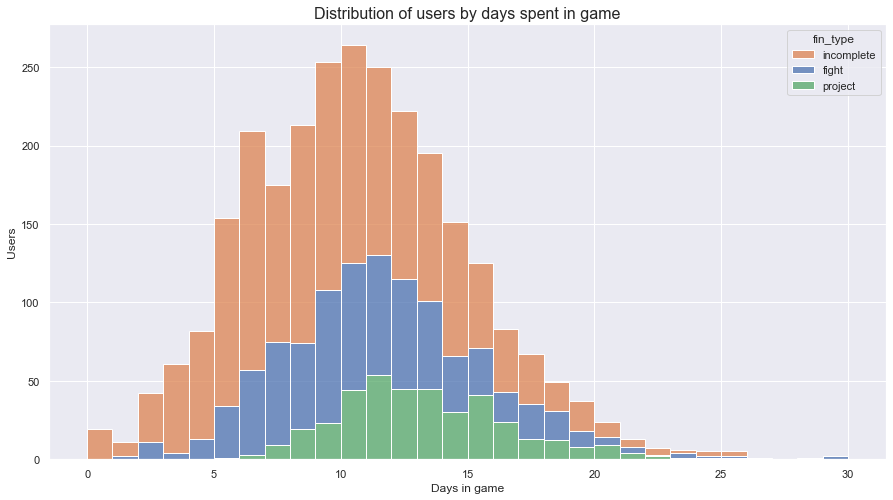

In [302]:
sns.set(rc={'figure.figsize':(15,8)})
palette ={ "fight": "C0","incomplete": "C1", "project": "C2"}
f = plt.figure(figsize=(15,8))
ax = f.add_subplot(1,1,1)
sns.histplot(data=fb_users, ax=ax, stat="count", multiple="stack",
             x="days_spent", kde=False,
             palette=palette, hue="fin_type",
             element="bars", legend=True, bins=30)
plt.title('Distribution of users by days spent in game', fontsize=16)
plt.xlabel('Days in game')
plt.ylabel('Users');

Distribution by the amount of completed buildings.

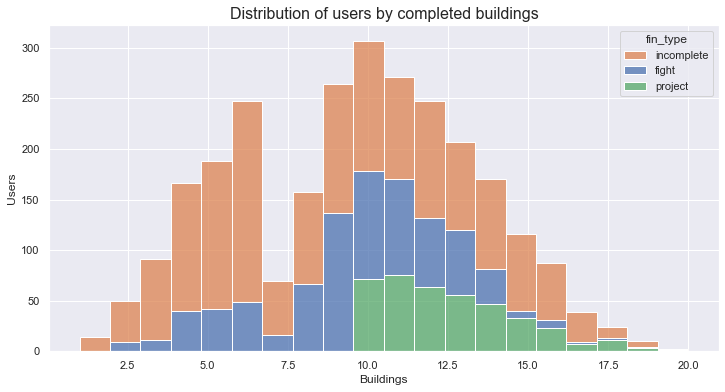

In [303]:
f = plt.figure(figsize=(12,6))
ax = f.add_subplot(1,1,1)
palette ={ "fight": "C0","incomplete": "C1", "project": "C2"}
sns.histplot(data=fb_users, ax=ax, stat="count", multiple="stack",
             x="buildings", kde=False,
             palette=palette, hue="fin_type",
             element="bars", legend=True, bins=20)
plt.title('Distribution of users by completed buildings', fontsize=16)
plt.xlabel('Buildings')
plt.ylabel('Users');

Scatter plot showing the amount of the completed buildings by the days spent in the game and the style of the first level completion.

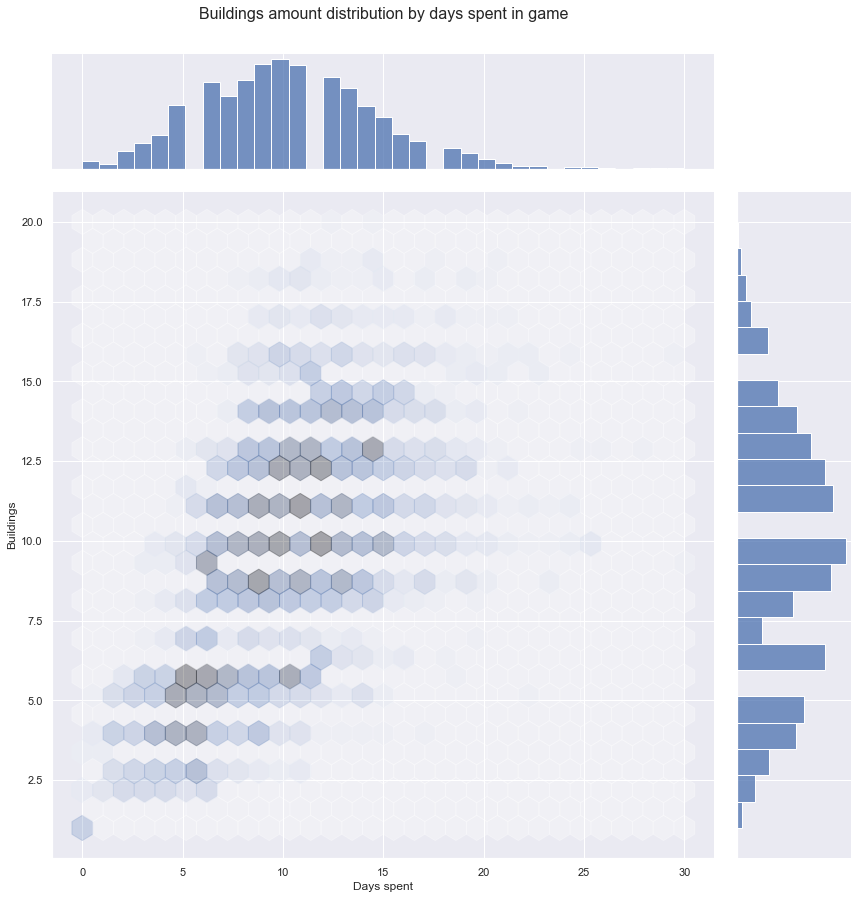

In [304]:
#fb_users.plot.scatter(x='days_spent', y='buildings')
sns.set(rc={'figure.figsize':(12,12)})
palette ={ "fight": "C0","incomplete": "C1", "project": "C2"}

sns.jointplot(data=fb_users, 
                x="days_spent", 
                y="buildings", 
                #hue="fin_type",
                kind='hex',
                palette=palette, 
                height  = 12, alpha=0.3
              )
plt.title('Buildings amount distribution by days spent in game',  y=1.25,fontsize=16)
plt.xlabel('Days spent')
plt.ylabel('Buildings');

Pie chart of users by the first level completion types.

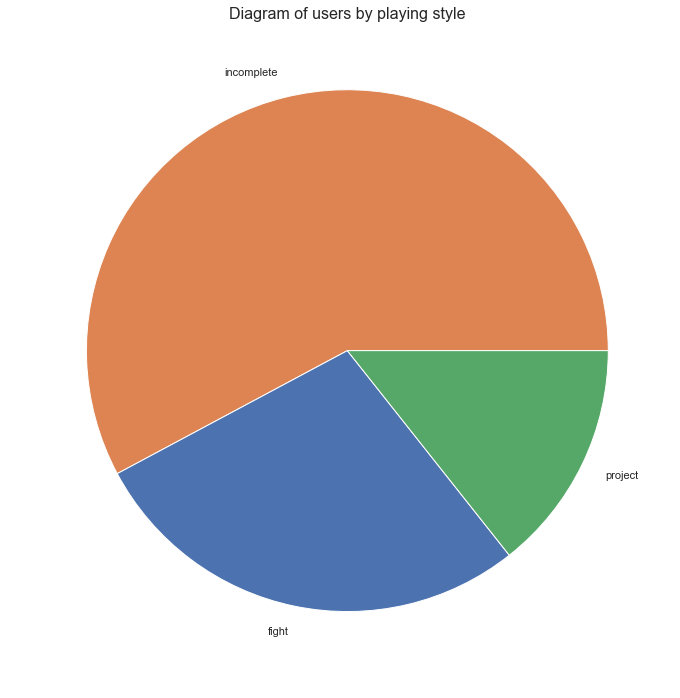

In [305]:
fb_users.groupby('fin_type')['source'].count()\
                                      .sort_values(ascending=False)\
                                      .plot.pie(colors = ['C1','C0','C2'])
plt.title('Diagram of users by playing style', fontsize=16)
plt.xlabel(' ')
plt.ylabel(' ');

Let's see how much time in game was spent by users who have not completed the first level.

In [306]:
fb_users.query("fin_type =='incomplete'").describe()

,days_spent,buildings
count,1576.000000,1576.000000
mean,9.402284,8.901015
std,4.360352,4.181331
min,0.000000,1.000000
25%,6.000000,5.000000
50%,9.000000,9.000000
75%,12.000000,12.000000
max,25.000000,20.000000


The amount of days spent in the game depending on the type of the first level completion.

In [307]:
fb_users.groupby('fin_type')['days_spent'].describe()

,count,mean,std,min,25%,50%,75%,max
fin_type,,,,,,,,
fight,759.0,10.546772,4.090353,1.0,8.0,10.0,13.0,30.0
incomplete,1576.0,9.402284,4.360352,0.0,6.0,9.0,12.0,25.0
project,391.0,12.905371,3.528455,5.0,10.0,12.0,15.0,28.0


The amount of buildings depending on the first level completion type.

In [308]:
fb_users.groupby('fin_type')['buildings'].describe()

,count,mean,std,min,25%,50%,75%,max
fin_type,,,,,,,,
fight,759.0,9.429513,3.027573,2.0,8.0,10.0,11.0,19.0
incomplete,1576.0,8.901015,4.181331,1.0,5.0,9.0,12.0,20.0
project,391.0,12.649616,2.198483,10.0,11.0,12.0,14.0,20.0


#### Instagram

In [309]:
inst_users = users.query("source == 'instagram_new_adverts'")

In [310]:
inst_users.sample(10)

,source,first_event,last_event,days_spent,buildings,fin_type
user_id,,,,,,
0a13f33a-99f8-44f6-b962-8858a520864c,instagram_new_adverts,2020-05-05,2020-05-14,8,12,incomplete
93a191dd-28d1-460b-8ef9-f632c9e449dc,instagram_new_adverts,2020-05-04,2020-05-10,5,6,incomplete
49b9fb90-4cb3-4c1d-8b37-b6351d05680f,instagram_new_adverts,2020-05-05,2020-05-30,25,13,project
8e4ca87f-9d38-4403-b767-e8b5d90bffc9,instagram_new_adverts,2020-05-04,2020-05-15,10,10,fight
4381d69c-3239-4662-aabf-a7740ca27d6b,instagram_new_adverts,2020-05-04,2020-05-17,12,13,incomplete
48e72094-d0fd-42f0-ba8e-ec0202566bbd,instagram_new_adverts,2020-05-04,2020-05-21,16,8,fight
77f5a3a6-2562-42bb-945f-0a9dbd2a8212,instagram_new_adverts,2020-05-05,2020-05-13,7,5,incomplete
8b03699f-7633-444b-9f84-59b0f70bccad,instagram_new_adverts,2020-05-09,2020-05-22,13,6,incomplete
9b06988a-fa82-4c1d-b4cb-eb80bc2a9046,instagram_new_adverts,2020-05-07,2020-05-16,8,9,fight


Distribution of users by days spent in the game.

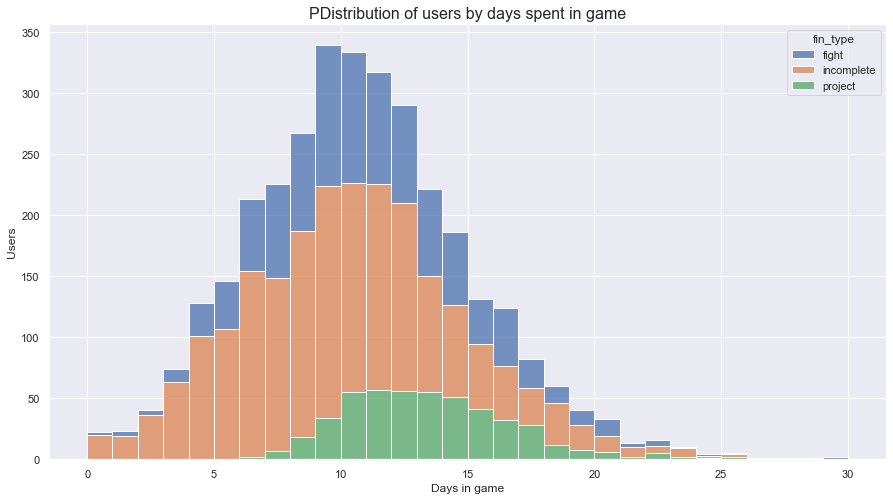

In [311]:
f = plt.figure(figsize=(15,8))
ax = f.add_subplot(1,1,1)
palette ={"incomplete": "C1", "fight": "C0", "project": "C2"}
sns.histplot(data=inst_users, ax=ax, stat="count", multiple="stack",
             x="days_spent", kde=False,
             palette=palette, hue="fin_type",
             element="bars", legend=True, bins=30)

plt.title('РDistribution of users by days spent in game', fontsize=16)
plt.xlabel('Days in game')
plt.ylabel('Users');

Distribution by the amount of completed buildings.

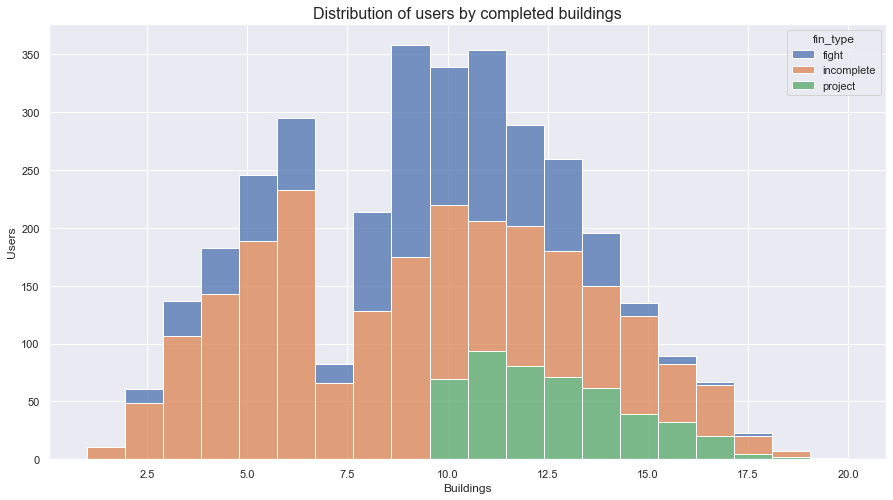

In [312]:
f = plt.figure(figsize=(15,8))
ax = f.add_subplot(1,1,1)
sns.histplot(data=inst_users, ax=ax, stat="count", multiple="stack",
             x="buildings", kde=False,
             palette=palette, hue="fin_type",
             element="bars", legend=True, bins=20)
plt.title('Distribution of users by completed buildings', fontsize=16)
plt.xlabel('Buildings')
plt.ylabel('Users');

Scatter plot showing the amount of the completed buildings by the days spent in the game and the style of the first level completion.

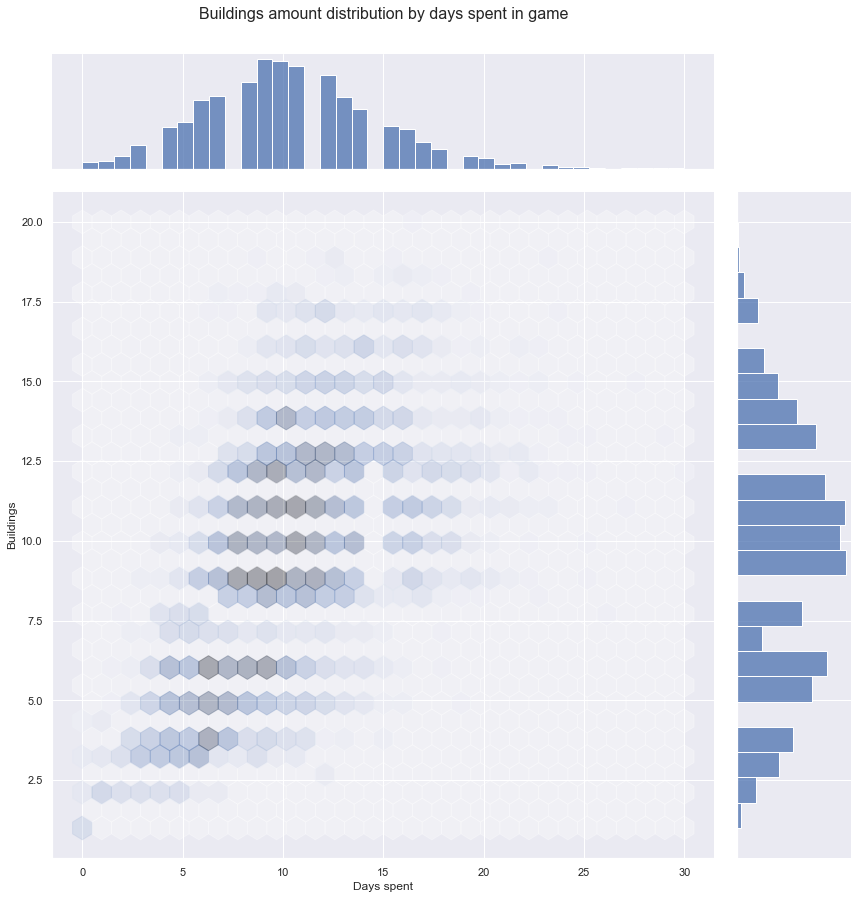

In [313]:
#fb_users.plot.scatter(x='days_spent', y='buildings')
sns.set(rc={'figure.figsize':(15,8)})
palette ={ "fight": "C0","incomplete": "C1", "project": "C2"}
sns.jointplot(data=inst_users, 
                x="days_spent", 
                y="buildings", 
                #hue="fin_type",
                kind='hex',
                palette=palette, 
                height  = 12, alpha=0.3
              )
plt.title('Buildings amount distribution by days spent in game',  y=1.25,fontsize=16)
plt.xlabel('Days spent')
plt.ylabel('Buildings');

Pie chart of users by the first level completion types.

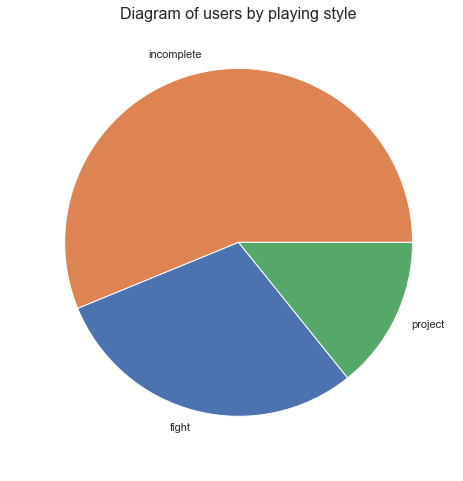

In [314]:
inst_users.groupby('fin_type')['source'].count()\
                                      .sort_values(ascending=False)\
                                      .plot.pie(colors = ['C1','C0','C2'])
plt.title('Diagram of users by playing style', fontsize=16)
plt.xlabel(' ')
plt.ylabel(' ');

Let's see how much time in game was spent by users who have not completed the first level.

In [315]:
inst_users.query("fin_type =='incomplete'").describe()

,days_spent,buildings
count,1881.000000,1881.000000
mean,9.418926,8.738437
std,4.351564,4.099125
min,0.000000,1.000000
25%,6.000000,5.000000
50%,9.000000,9.000000
75%,12.000000,12.000000
max,26.000000,19.000000


The amount of days spent in the game depending on the type of the first level completion.

In [316]:
inst_users.groupby('fin_type')['days_spent'].describe()

,count,mean,std,min,25%,50%,75%,max
fin_type,,,,,,,,
fight,990.0,10.622222,4.084139,0.0,8.0,10.0,13.0,30.0
incomplete,1881.0,9.418926,4.351564,0.0,6.0,9.0,12.0,26.0
project,476.0,13.039916,3.408423,6.0,11.0,13.0,15.0,28.0


The amount of buildings depending on the first level completion type.

In [317]:
inst_users.groupby('fin_type')['buildings'].describe()

,count,mean,std,min,25%,50%,75%,max
fin_type,,,,,,,,
fight,990.0,9.400000,3.054543,2.0,8.0,10.0,11.0,18.0
incomplete,1881.0,8.738437,4.099125,1.0,5.0,9.0,12.0,19.0
project,476.0,12.756303,2.113481,10.0,11.0,12.0,14.0,20.0


#### YouTube

In [318]:
yt_users = users.query("source == 'youtube_channel_reklama'")

In [319]:
yt_users.sample(10)

,source,first_event,last_event,days_spent,buildings,fin_type
user_id,,,,,,
fb06115b-3595-4019-9f8b-64443653d7ff,youtube_channel_reklama,2020-05-08,2020-05-13,4,2,incomplete
8e235b5e-4156-42da-8226-e27811bc7cc0,youtube_channel_reklama,2020-05-06,2020-05-16,9,8,incomplete
f6d136ab-a385-4092-b067-eef9e8004cb2,youtube_channel_reklama,2020-05-04,2020-05-15,11,15,incomplete
16862126-1f8f-4b9a-b42d-7fcb8803b086,youtube_channel_reklama,2020-05-04,2020-05-13,8,8,fight
af925058-7fe3-43c1-8e16-27713afa5606,youtube_channel_reklama,2020-05-09,2020-05-15,5,5,incomplete
96183f20-b520-46ab-a4f2-1e3daa1b9875,youtube_channel_reklama,2020-05-04,2020-05-17,12,9,fight
0539491f-b914-4538-9ca9-77b1eea31737,youtube_channel_reklama,2020-05-04,2020-05-18,13,7,fight
70af4742-ef05-471f-8aa9-8f61b47f2233,youtube_channel_reklama,2020-05-04,2020-05-12,8,10,fight
864fa998-9ae9-45e3-95b8-b2c7d113fca5,youtube_channel_reklama,2020-05-04,2020-05-18,13,8,fight


Distribution users by days spent in the game.

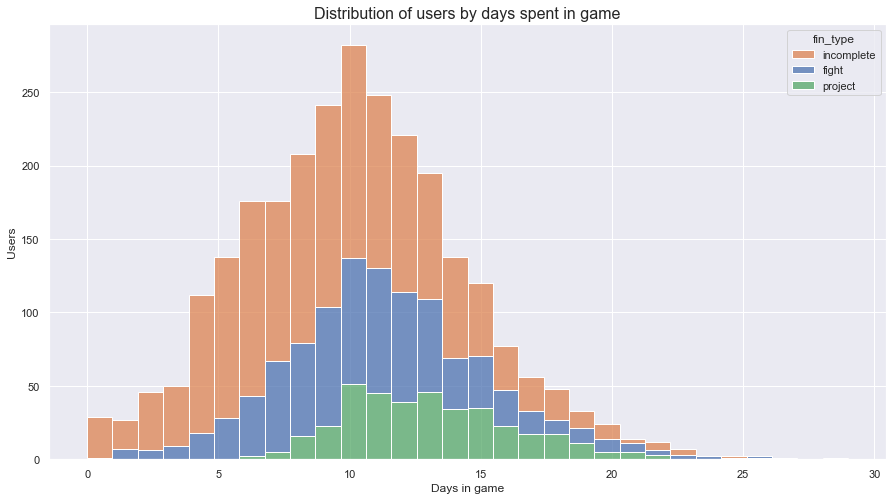

In [320]:
f = plt.figure(figsize=(15,8))
ax = f.add_subplot(1,1,1)
sns.histplot(data=yt_users, ax=ax, stat="count", multiple="stack",
             x="days_spent", kde=False,
             palette=palette, hue="fin_type",
             element="bars", legend=True, bins=30)

plt.title('Distribution of users by days spent in game', fontsize=16)
plt.xlabel('Days in game')
plt.ylabel('Users');

Distribution by the amount of completed buildings.

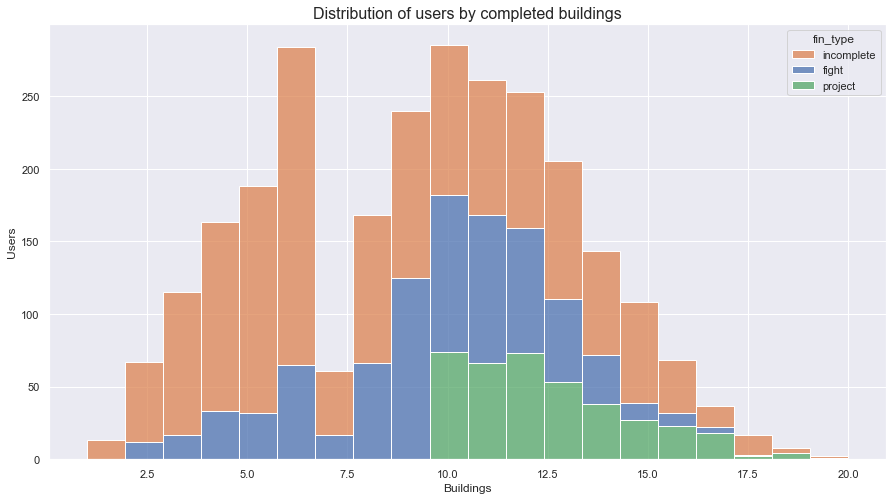

In [321]:
f = plt.figure(figsize=(15,8))
ax = f.add_subplot(1,1,1)
sns.histplot(data=yt_users, ax=ax, stat="count", multiple="stack",
             x="buildings", kde=False,
             palette=palette, hue="fin_type",
             element="bars", legend=True, bins=20)
plt.title('Distribution of users by completed buildings', fontsize=16)
plt.xlabel('Buildings')
plt.ylabel('Users');

Scatter plot showing the amount of the completed buildings by the days spent in the game and the style of the first level completion.

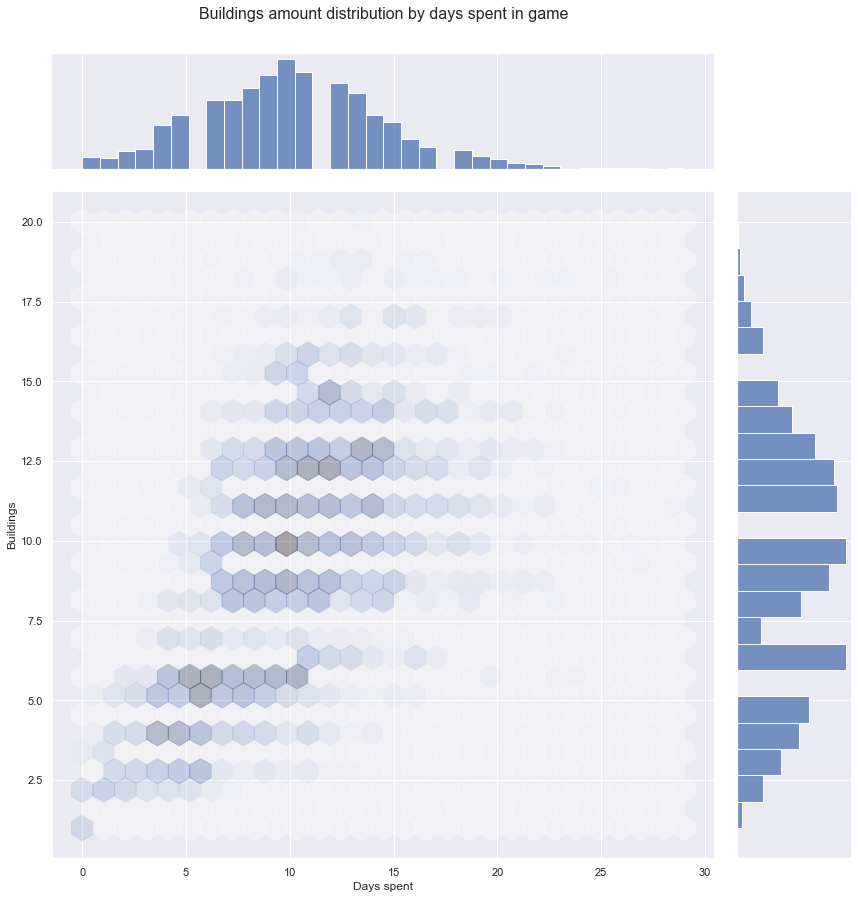

In [322]:
#fb_users.plot.scatter(x='days_spent', y='buildings')
sns.set(rc={'figure.figsize':(15,8)})
palette ={ "fight": "C0","incomplete": "C1", "project": "C2"}
sns.jointplot(data=yt_users, 
                x="days_spent", 
                y="buildings", 
                #hue="fin_type",
                kind='hex',
                palette=palette, 
                height  = 12, alpha=0.3
              )
plt.title('Buildings amount distribution by days spent in game',  y=1.25,fontsize=16)
plt.xlabel('Days spent')
plt.ylabel('Buildings');

Pie chart of users by the first level completion types.

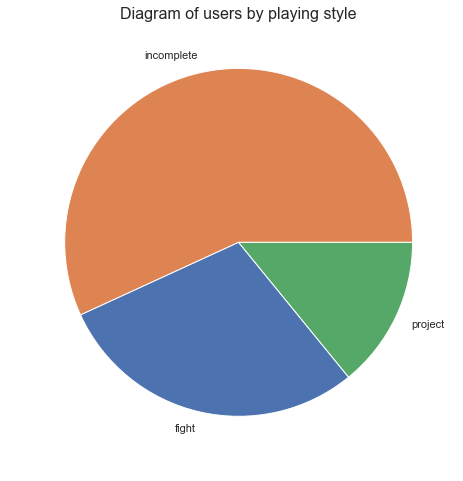

In [323]:
yt_users.groupby('fin_type')['source'].count()\
                                      .sort_values(ascending=False)\
                                      .plot.pie(colors = ['C1','C0','C2'])
plt.title('Diagram of users by playing style', fontsize=16)
plt.xlabel(' ')
plt.ylabel(' ');

Let's see how much time in game was spent by users who have not completed the first level.

In [324]:
yt_users.query("fin_type =='incomplete'").describe()

,days_spent,buildings
count,1527.000000,1527.000000
mean,9.075966,8.391618
std,4.379386,4.124839
min,0.000000,1.000000
25%,6.000000,5.000000
50%,9.000000,8.000000
75%,12.000000,12.000000
max,29.000000,20.000000


The amount of days spent in the game depending on the type of the first level completion.

In [325]:
yt_users.groupby('fin_type')['days_spent'].describe()

,count,mean,std,min,25%,50%,75%,max
fin_type,,,,,,,,
fight,780.0,10.600000,4.099720,0.0,8.0,10.0,13.0,27.0
incomplete,1527.0,9.075966,4.379386,0.0,6.0,9.0,12.0,29.0
project,379.0,13.055409,3.379770,6.0,10.0,13.0,15.0,26.0


The amount of buildings depending on the first level completion type.

In [326]:
yt_users.groupby('fin_type')['buildings'].describe()

,count,mean,std,min,25%,50%,75%,max
fin_type,,,,,,,,
fight,780.0,9.474359,3.070102,2.0,8.0,10.0,12.0,18.0
incomplete,1527.0,8.391618,4.124839,1.0,5.0,8.0,12.0,20.0
project,379.0,12.596306,2.197422,10.0,11.0,12.0,14.0,20.0


#### Yandex

In [327]:
yad_users = users.query("source == 'yandex_direct'")

In [328]:
yad_users.sample(10)

,source,first_event,last_event,days_spent,buildings,fin_type
user_id,,,,,,
0c533c77-2358-40c0-877d-8b76929cb958,yandex_direct,2020-05-05,2020-05-12,7,9,incomplete
177640d9-b1d4-4032-8c64-68b710bba48b,yandex_direct,2020-05-04,2020-05-17,12,8,fight
615e6e13-f4fa-4e7e-9b20-b2c18be56ebe,yandex_direct,2020-05-04,2020-05-10,6,4,incomplete
e11b0b9e-0573-4af5-b62f-ccd28918f22e,yandex_direct,2020-05-04,2020-05-22,18,10,incomplete
aec152ae-2953-43c9-9447-b239f7d978b1,yandex_direct,2020-05-04,2020-05-11,6,4,incomplete
199ad15f-2f4f-4282-95b1-5a6e91404de6,yandex_direct,2020-05-05,2020-05-11,6,8,incomplete
a596298e-dd05-44ef-a6be-7bb7dc447eed,yandex_direct,2020-05-04,2020-05-15,11,14,project
cc3de9b2-f9bd-4793-9767-d4b62eb5080f,yandex_direct,2020-05-04,2020-05-16,12,14,fight
8aec1ded-fb2a-476b-b523-7becae7a8311,yandex_direct,2020-05-06,2020-05-10,3,3,incomplete


Dividing users by days spent in the game.

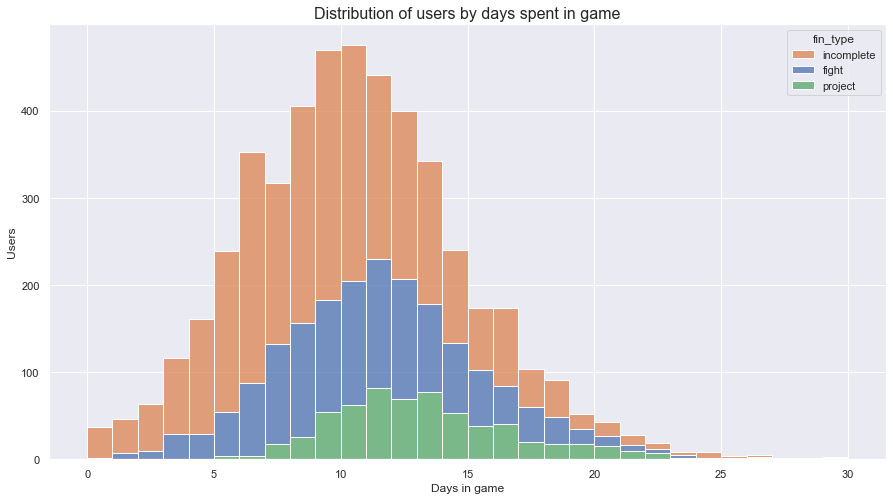

In [329]:
f = plt.figure(figsize=(15,8))
ax = f.add_subplot(1,1,1)
sns.histplot(data=yad_users, ax=ax, stat="count", multiple="stack",
             x="days_spent", kde=False,
             palette=palette, hue="fin_type",
             element="bars", legend=True, bins=30)
plt.title('Distribution of users by days spent in game', fontsize=16)
plt.xlabel('Days in game')
plt.ylabel('Users');

Distribution by the amount of completed buildings.

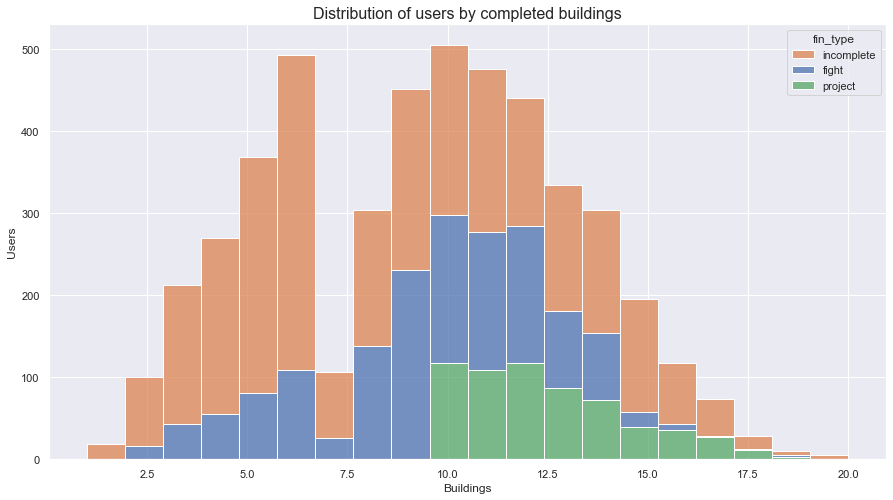

In [330]:
f = plt.figure(figsize=(15,8))
ax = f.add_subplot(1,1,1)
sns.histplot(data=yad_users, ax=ax, stat="count", multiple="stack",
             x="buildings", kde=False,
             palette=palette, hue="fin_type",
             element="bars", legend=True, bins=20)
plt.title('Distribution of users by completed buildings', fontsize=16)
plt.xlabel('Buildings')
plt.ylabel('Users');

Scatter plot showing the amount of the completed buildings by the days spent in the game and the style of the first level completion.

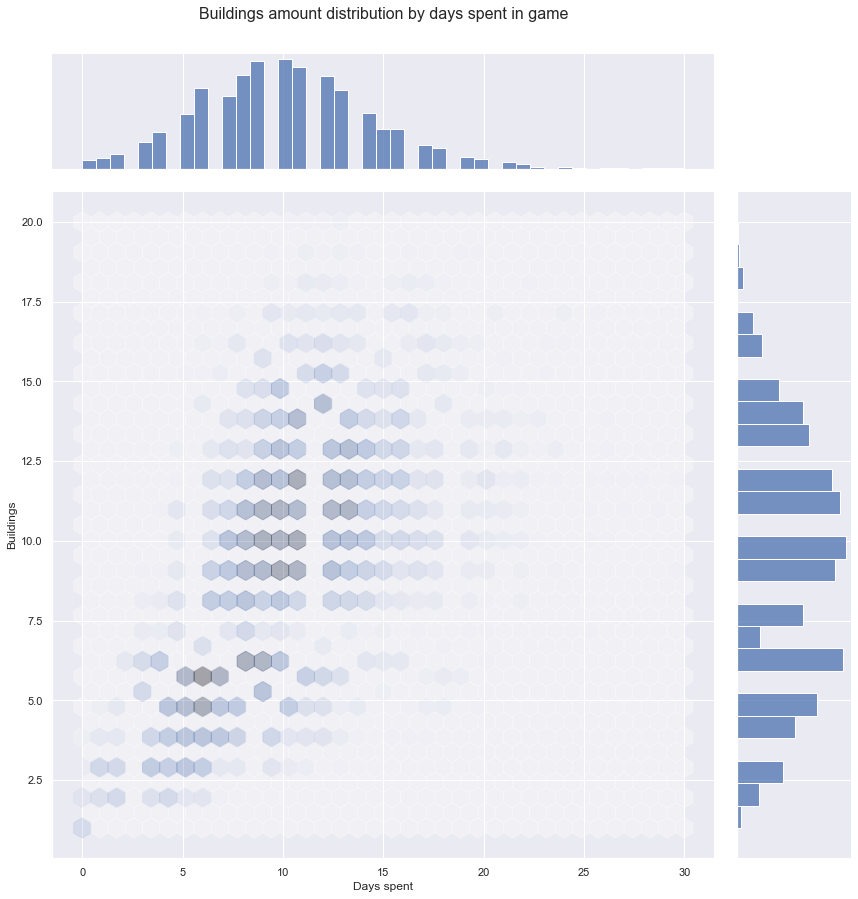

In [331]:
#fb_users.plot.scatter(x='days_spent', y='buildings')
sns.set(rc={'figure.figsize':(15,8)})
palette ={ "fight": "C0","incomplete": "C1", "project": "C2"}
sns.jointplot(data=yad_users, 
                x="days_spent", 
                y="buildings", 
                #hue="fin_type",
                kind='hex',
                palette=palette, 
                height  = 12, alpha=0.3
              )
plt.title('Buildings amount distribution by days spent in game',  y=1.25,fontsize=16)
plt.xlabel('Days spent')
plt.ylabel('Buildings');

Pie chart of users by the first level completion types.

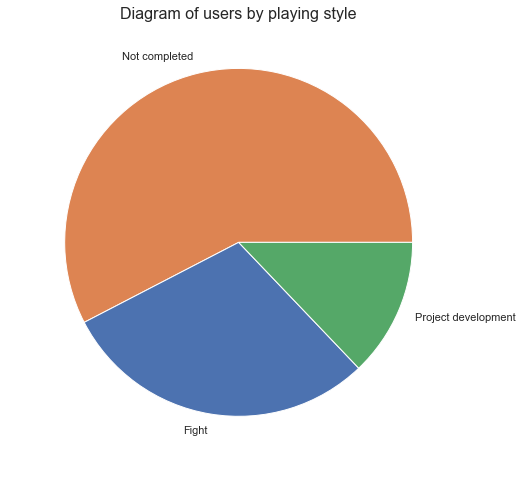

In [369]:
yad_users.groupby('fin_type')['source'].count()\
                                      .sort_values(ascending=False)\
                                      .plot.pie(colors = ['C1','C0','C2'],
                                                labels = ['Not completed', 'Fight', 'Project development'])
plt.title('Diagram of users by playing style', fontsize=16)
plt.xlabel(' ')
plt.ylabel(' ');

Let's see how much time in game was spent by users who have not completed the first level.

In [333]:
yad_users.query("fin_type =='incomplete'").describe()

,days_spent,buildings
count,2775.000000,2775.000000
mean,9.243964,8.609369
std,4.311745,4.132823
min,0.000000,1.000000
25%,6.000000,5.000000
50%,9.000000,8.000000
75%,12.000000,12.000000
max,26.000000,20.000000


The amount of days spent in the game depending on the type of the first level completion.

In [334]:
yad_users.groupby('fin_type')['days_spent'].describe()

,count,mean,std,min,25%,50%,75%,max
fin_type,,,,,,,,
fight,1422.0,10.630098,4.137114,0.0,8.0,10.0,13.0,30.0
incomplete,2775.0,9.243964,4.311745,0.0,6.0,9.0,12.0,26.0
project,620.0,12.883871,3.704261,5.0,10.0,12.0,15.0,29.0


The amount of buildings depending on the first level completion type.

In [335]:
yad_users.groupby('fin_type')['buildings'].describe()

,count,mean,std,min,25%,50%,75%,max
fin_type,,,,,,,,
fight,1422.0,9.375527,3.076719,2.0,8.0,10.0,12.0,19.0
incomplete,2775.0,8.609369,4.132823,1.0,5.0,8.0,12.0,20.0
project,620.0,12.595161,2.157523,10.0,11.0,12.0,14.0,19.0


#### Comparison

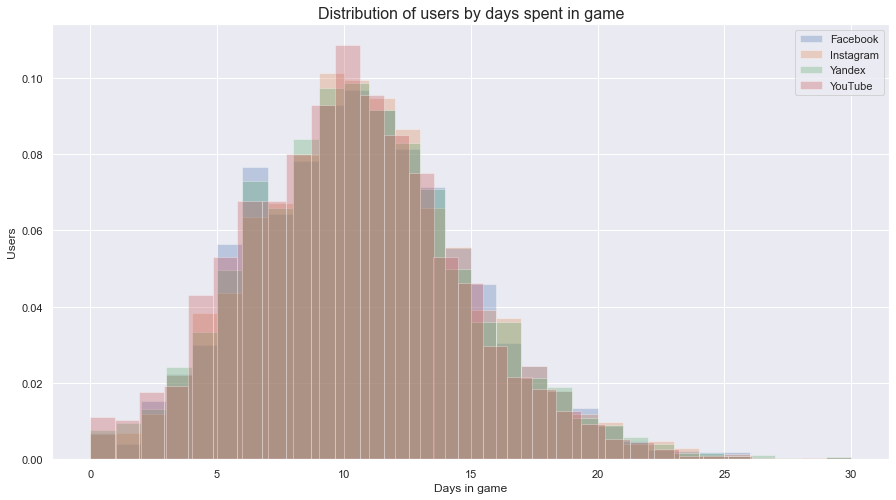

In [336]:
fig, ax = plt.subplots()
ax.hist(fb_users['days_spent'], bins=30, density=True, alpha=0.3)
ax.hist(inst_users['days_spent'], bins=30, density=True, alpha=0.3)
ax.hist(yad_users['days_spent'], bins=30, density=True, alpha=0.3)
ax.hist(yt_users['days_spent'], bins=30, density=True, alpha=0.3)
plt.legend(['Facebook','Instagram','Yandex','YouTube'])
plt.title('Distribution of users by days spent in game', fontsize=16)
plt.xlabel('Days in game')
plt.ylabel('Users');


#### Level completion

Percentage of the users finished the first level in different ways.

In [337]:
fin_type_source_pivot = users.pivot_table(index='source', columns='fin_type', values='days_spent',aggfunc= 'count')
display(fin_type_source_pivot)

fin_type,fight,incomplete,project
source,,,
facebook_ads,759,1576,391
instagram_new_adverts,990,1881,476
yandex_direct,1422,2775,620
youtube_channel_reklama,780,1527,379


In [338]:
fin_type_source_pivot['total'] = fin_type_source_pivot.sum(axis=1)

In [339]:
fin_type_source_pivot['fight'] = fin_type_source_pivot['fight'] / fin_type_source_pivot['total'] *100
fin_type_source_pivot['incomplete'] = fin_type_source_pivot['incomplete'] / fin_type_source_pivot['total'] *100
fin_type_source_pivot['project'] = fin_type_source_pivot['project'] / fin_type_source_pivot['total'] *100

In [340]:
display(fin_type_source_pivot)

fin_type,fight,incomplete,project,total
source,,,,
facebook_ads,27.842993,57.813646,14.343360,2726
instagram_new_adverts,29.578727,56.199582,14.221691,3347
yandex_direct,29.520448,57.608470,12.871082,4817
youtube_channel_reklama,29.039464,56.850335,14.110201,2686


In [341]:
fin_type_source_complete_pivot = users.query("fin_type != 'incomplete'").pivot_table(index='source', columns='fin_type', values='days_spent',aggfunc= 'count')
fin_type_source_complete_pivot['total'] = fin_type_source_complete_pivot.sum(axis=1)
fin_type_source_complete_pivot['fight'] = fin_type_source_complete_pivot['fight'] / fin_type_source_complete_pivot['total'] *100
fin_type_source_complete_pivot['project'] = fin_type_source_complete_pivot['project'] / fin_type_source_complete_pivot['total'] *100
display(fin_type_source_complete_pivot)

fin_type,fight,project,total
source,,,
facebook_ads,66.000000,34.000000,1150
instagram_new_adverts,67.530696,32.469304,1466
yandex_direct,69.637610,30.362390,2042
youtube_channel_reklama,67.299396,32.700604,1159


#### Buildings

An average amount of buildings.

In [342]:
build_source_pivot = users.pivot_table(index='source', columns='fin_type', values='buildings',aggfunc= 'mean')
display(build_source_pivot)

fin_type,fight,incomplete,project
source,,,
facebook_ads,9.429513,8.901015,12.649616
instagram_new_adverts,9.400000,8.738437,12.756303
yandex_direct,9.375527,8.609369,12.595161
youtube_channel_reklama,9.474359,8.391618,12.596306


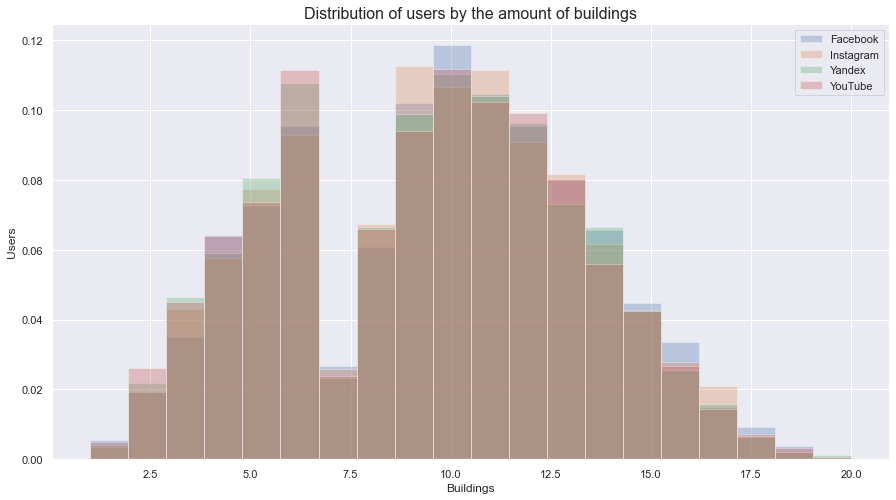

In [343]:
fig, ax = plt.subplots()
ax.hist(fb_users['buildings'], bins=20, density=True, alpha=0.3)
ax.hist(inst_users['buildings'], bins=20, density=True, alpha=0.3)
ax.hist(yad_users['buildings'], bins=20, density=True, alpha=0.3)
ax.hist(yt_users['buildings'], bins=20, density=True, alpha=0.3)

plt.legend(['Facebook','Instagram','Yandex','YouTube'])
plt.title('Distribution of users by the amount of buildings', fontsize=16)
plt.xlabel('Buildings')
plt.ylabel('Users');

#### Conclusion

* We do not observe a big difference in behavior of the users came from the different sources.
* The distribution of the users by days spent in the game is close to a normal with slight shift to the left. The median and the average are close.
* Users who prefer to complete the first level by fighting the enemy usually spent less days on the first level than the users who choose completing the project.
* According to the distribution diagram users need to build at least 10 buildings in order to complete the project.
* There is a drop seen on the chart at 7 buildings. There is no obvious reason for that according to the provided data.  Should be discussed with the developers team.
* There is a positive tendency in the buildings and days spent dependency chart but it can not be considered as a rule.
* The playing style pie chart show that the users who did not finished the first level are prevail.
* About 57% of all users do not complete the first level.
* And 67% of users who finished the level have chosen the fight with the enemy.

### By engagement

#### Users who spent the most time in the game (duration in minutes and days, retention)

The average speed of the first level completion 

In [344]:
av_days_pivot = users.pivot_table(index='source', columns='fin_type', values='days_spent',aggfunc= 'mean')
display(av_days_pivot)

fin_type,fight,incomplete,project
source,,,
facebook_ads,10.546772,9.402284,12.905371
instagram_new_adverts,10.622222,9.418926,13.039916
yandex_direct,10.630098,9.243964,12.883871
youtube_channel_reklama,10.600000,9.075966,13.055409


In [345]:
av_days_pivot = users.pivot_table(index='source', columns='fin_type', values='days_spent',aggfunc= 'median')
display(av_days_pivot)

fin_type,fight,incomplete,project
source,,,
facebook_ads,10,9,12
instagram_new_adverts,10,9,13
yandex_direct,10,9,12
youtube_channel_reklama,10,9,13


#### Users who have not finished the first level and churned users

In [346]:
churn_users = users.query("fin_type == 'incomplete'")
display(churn_users.sample(5))

,source,first_event,last_event,days_spent,buildings,fin_type
user_id,,,,,,
50f0e9c2-66ef-4155-8eec-8d987f2c5f60,facebook_ads,2020-05-06,2020-05-11,4,5,incomplete
88594f5e-4c1e-42f1-b42f-c3451e133887,yandex_direct,2020-05-06,2020-05-21,14,8,incomplete
3d934d7e-1985-410c-ab89-8b3c7310b89b,facebook_ads,2020-05-04,2020-05-11,7,11,incomplete
8476d033-b0b9-48d5-a7b3-bebd8a560849,facebook_ads,2020-05-04,2020-05-14,10,7,incomplete
9294a158-c0ad-4c6f-98b9-561d55ab0283,yandex_direct,2020-05-04,2020-05-18,14,13,incomplete


In [347]:
retained_users = users.query("fin_type != 'incomplete'")

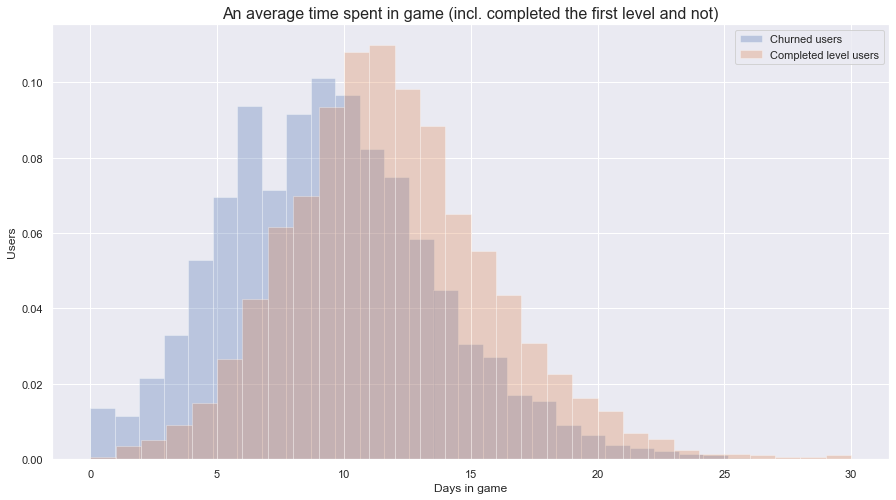

In [370]:
fig, ax = plt.subplots()
ax.hist(churn_users['days_spent'], bins=30, density=True, alpha=0.3)
ax.hist(retained_users['days_spent'], bins=30, density=True, alpha=0.3)

plt.legend(['Churned users','Completed level users'])
plt.title('An average time spent in game (incl. completed the first level and not)', fontsize=16)
plt.xlabel('Days in game')
plt.ylabel('Users');

#### Conclusion

* Completed the first level users spent in the game more days on average than other users.
* The average time spent to complete the first level is 10-12 days. 
* The churned users spent in the game 9 days on average.

## Traffic sources analysis 

### Dynamics of installations

The amount of acquired users by dates with breakdown by traffic source.

In [349]:
users_source_by_date = users.pivot_table(index='first_event', columns='source', values='days_spent', aggfunc='count')
display(users_source_by_date)

source,facebook_ads,instagram_new_adverts,yandex_direct,youtube_channel_reklama
first_event,,,,
2020-05-04,1184,1452,2078,1146
2020-05-05,694,796,1208,663
2020-05-06,345,472,664,366
2020-05-07,224,270,395,220
2020-05-08,139,175,239,135
2020-05-09,84,112,144,100
2020-05-10,56,70,89,56


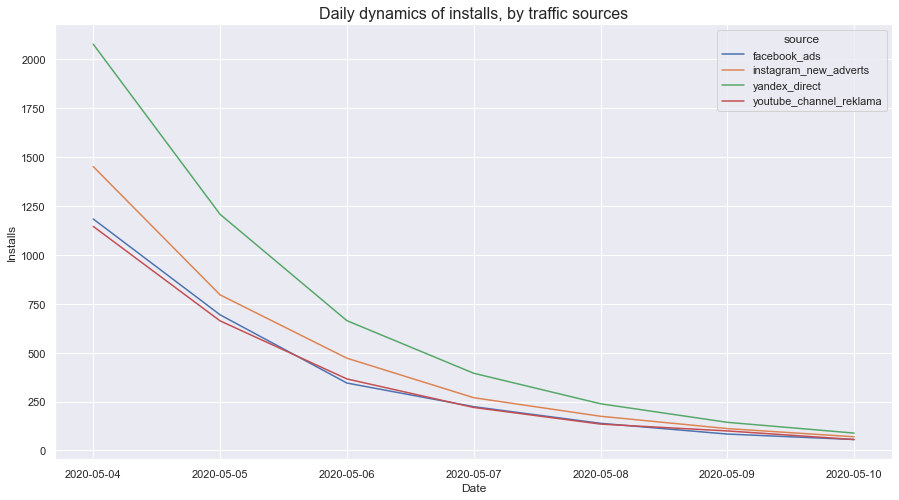

In [350]:
users_source_by_date.plot()
plt.title('Daily dynamics of installs, by traffic sources', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Installs');

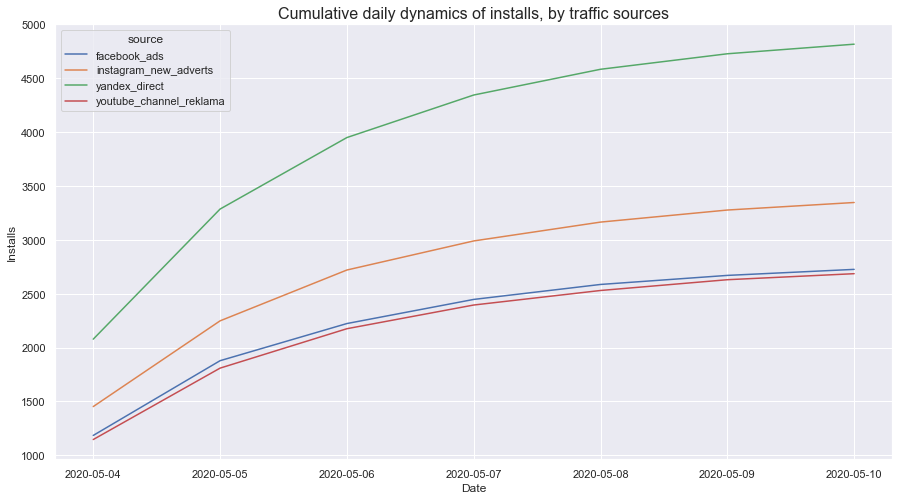

In [351]:
users_source_by_date_cum = users_source_by_date.cumsum()
users_source_by_date_cum.plot()
plt.title('Cumulative daily dynamics of installs, by traffic sources', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Installs');

### Dynamics of costs

Calculating the total costs of the users acquisition

In [352]:
ad_cos_by_day_source = ad_costs.pivot_table(index='day',values='cost',columns='source', aggfunc='sum')
display(ad_cos_by_day_source)

source,facebook_ads,instagram_new_adverts,yandex_direct,youtube_channel_reklama
day,,,,
2020-05-03,935.882786,943.204717,969.139394,454.224943
2020-05-04,548.354480,502.925451,554.651494,259.073224
2020-05-05,260.185754,313.970984,308.232990,147.041741
2020-05-06,177.982200,173.071145,180.917099,88.506074
2020-05-07,111.766796,109.915254,114.429338,55.740645
2020-05-08,68.009276,71.578739,62.961630,40.217907
2020-05-09,38.723350,46.775400,42.779505,23.314669


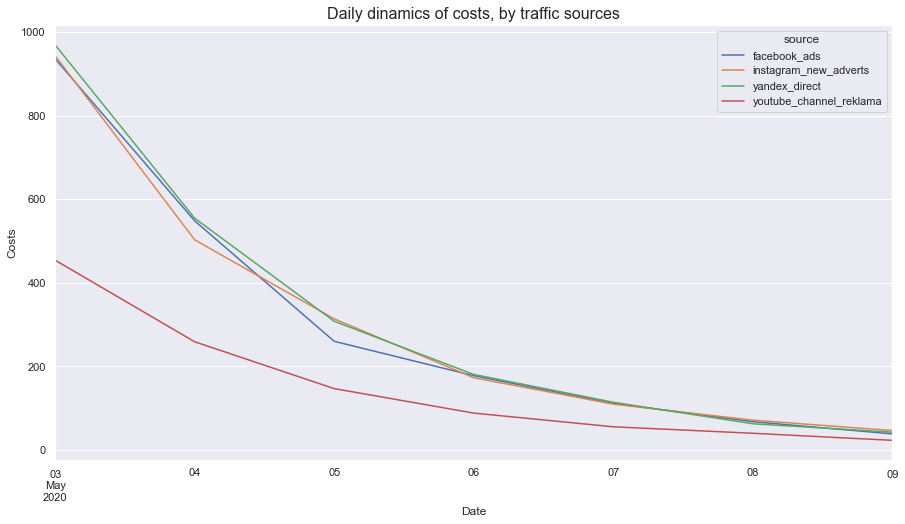

In [353]:
ad_cos_by_day_source.plot()
plt.title('Daily dinamics of costs, by traffic sources', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Costs');

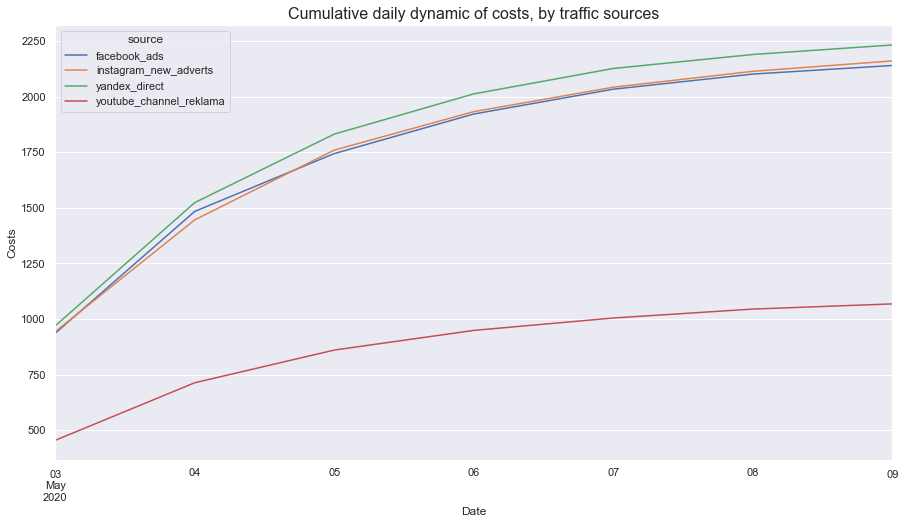

In [354]:
ad_cos_by_day_source_cum = ad_cos_by_day_source.cumsum()
ad_cos_by_day_source_cum.plot()
plt.title('Cumulative daily dynamic of costs, by traffic sources', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Costs');

Calculating the average costs per installation per day

In [355]:
users_source_by_date = users.pivot_table(index='first_event', columns='source', values='days_spent', aggfunc='count')
users_source_by_date.index = users_source_by_date.index - pd.Timedelta(days=1)
user_cost_per_day = ad_cos_by_day_source / users_source_by_date
display(user_cost_per_day)

source,facebook_ads,instagram_new_adverts,yandex_direct,youtube_channel_reklama
day,,,,
2020-05-03,0.790442,0.649590,0.466381,0.396357
2020-05-04,0.790136,0.631816,0.459149,0.390759
2020-05-05,0.754162,0.665193,0.464206,0.401753
2020-05-06,0.794563,0.641004,0.458018,0.402300
2020-05-07,0.804078,0.628087,0.478784,0.412894
2020-05-08,0.809634,0.639096,0.437234,0.402179
2020-05-09,0.691488,0.668220,0.480669,0.416333


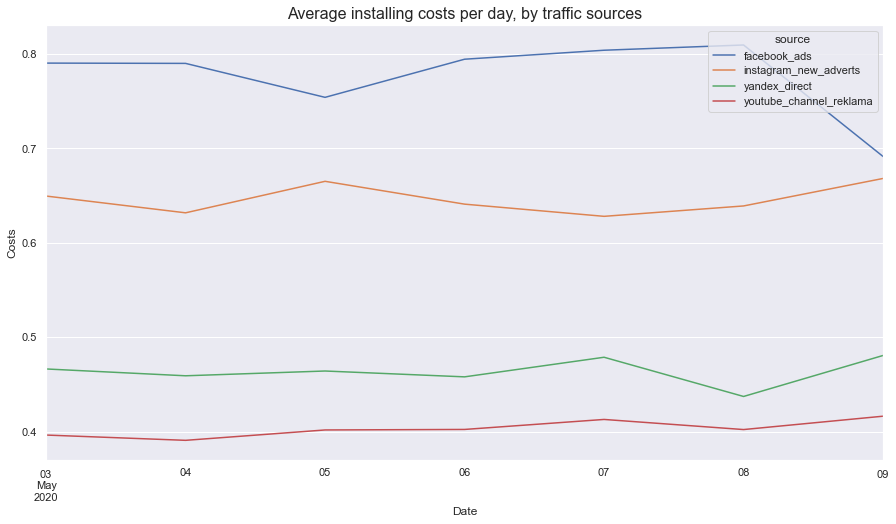

In [356]:
user_cost_per_day.plot()
plt.title('Average installing costs per day, by traffic sources', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Costs');

In [357]:
display(user_cost_per_day.mean())

source
facebook_ads               0.776358
instagram_new_adverts      0.646144
yandex_direct              0.463491
youtube_channel_reklama    0.403225
dtype: float64

### Level completion dynamics

Counting the percentage of the completed the first level users by dates of acquisition and traffic sources.

In [358]:
users_compl_incomp = users.copy()
#users_compl_incomp.query("fin_type !=incomplete ")['fin_type'] = 'complete'
users_compl_incomp['fin_type'] = users_compl_incomp['fin_type'].replace('fight',1)
users_compl_incomp['fin_type'] = users_compl_incomp['fin_type'].replace('project',1)
users_compl_incomp['fin_type'] = users_compl_incomp['fin_type'].replace('incomplete',0)

In [359]:
complete_rate_by_source = users_compl_incomp.pivot_table(index='first_event',
                                                         columns='source',
                                                         values='fin_type',
                                                         aggfunc='mean')
display(complete_rate_by_source)

source,facebook_ads,instagram_new_adverts,yandex_direct,youtube_channel_reklama
first_event,,,,
2020-05-04,0.448480,0.467631,0.441290,0.473822
2020-05-05,0.449568,0.464824,0.440397,0.450980
2020-05-06,0.391304,0.419492,0.433735,0.409836
2020-05-07,0.339286,0.388889,0.379747,0.368182
2020-05-08,0.359712,0.348571,0.355649,0.288889
2020-05-09,0.380952,0.258929,0.284722,0.320000
2020-05-10,0.250000,0.342857,0.325843,0.267857


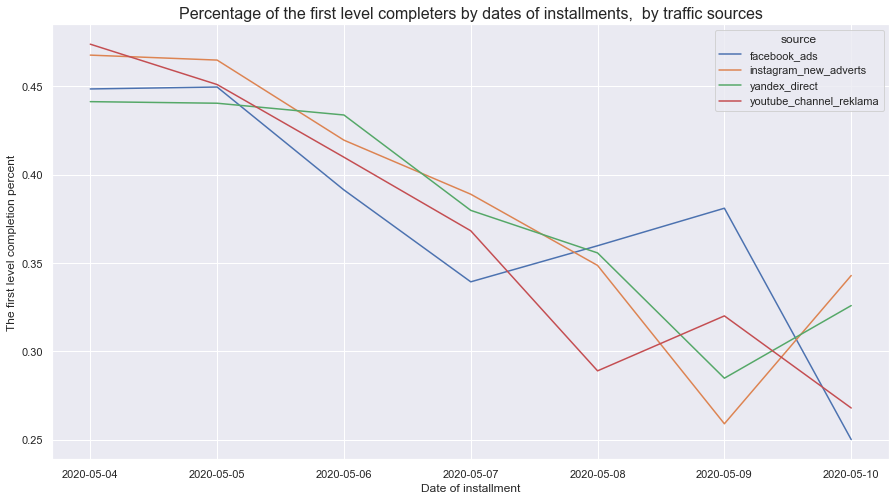

In [360]:
complete_rate_by_source.plot()
plt.title('Percentage of the first level completers by dates of installments,  by traffic sources', fontsize=16)
plt.xlabel('Date of installment')
plt.ylabel('The first level completion percent');

There are fewer installs at the end of the campaign and it causes big volatility.

### Conclusion 

* The amount of the acquired users is lower at the end of the marketing campaign than at its start. 
* The majority of the users were acquired through the adds in Yandex Direct.
* The second biggest part of the users — through Instagram. 
* Adds in YouTube and Facebook acquired an equal amount of the new users.
* The cheapest user acquisition is through YouTube.
* The average acquisition cost does not change in time and is: 
    * Facebook — 0.78 monetary units
    * Instagram — 0.65 monetary units
    * Yandex Direct  — 0.46 monetary units
    * YouTube — 0.4 monetary units.
* The percentage of the first level completion does not depend on the traffic source.
* The amount of the acquired users lowers by the end of the marketing campaign which increases variation.

## Hypothesis testing

### Hypothesis 1

$H_0$: The average time for different type of the first level completion does not vary significantly.

$H_1$: The average time for different type of the first level completion vary significantly.

In [361]:
sample_A = users.query("fin_type == 'fight'")['days_spent'].copy()
sample_B = users.query("fin_type == 'project'")['days_spent'].copy()

In [362]:
alpha = .05 # critical statistical significance level
# if the p-value is less than this - reject the hypothesis

results = st.ttest_ind(
    sample_A, 
    sample_B)
print('Type "fight" mean:', sample_A.mean())
print('Type "project" mean:', sample_B.mean(),'\n')
print('Fight to project difference', (sample_A.mean()/sample_B.mean()-1)*100,'\n')
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Rejecting the null hypothesis")
else:
    print("Can not reject the null hypothesis")  

Type "fight" mean: 10.606175651733738
Type "project" mean: 12.963022508038586 

Fight to project difference -18.181306518933592 

p-value: 1.8882835392369192e-97
Rejecting the null hypothesis


#### Conclusion

* The difference in level completion time depending on the style of play is 18%. Players who choose the project development spend more time in the game, about 13 days, versus 10 days for users who chose to fight the first enemy.
* The probability of making an error in rejecting this hypothesis is close to zero.  

### Hypothesis 2

$H_0$: Players who completed the first level and players who did not have, on average, spent the same number of days in the game

$H_1$: Players who completed the first level and players who did not have, on average, spent the same number of days in the game

In [363]:
sample_A2 = users.query("fin_type == 'fight' or fin_type == 'project'")['days_spent'].copy()
sample_B2 = users.query("fin_type == 'incomplete'")['days_spent'].copy()

In [364]:
alpha = .01 # critical statistical significance level
# if the p-value is less than this - reject the hypothesis

results = st.ttest_ind(
    sample_A2, 
    sample_B2)
print('Type "complete" mean:', sample_A2.mean())
print('Type "incomplete" mean:', sample_B2.mean(),'\n')
print('difference', (sample_A2.mean()/sample_B2.mean()-1)*100,'\n')
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Rejecting the null hypothesis")
else:
    print("Can not reject the null hypothesis")  

Type "complete" mean: 11.362214199759325
Type "incomplete" mean: 9.28547493233664 

difference 22.36546092209506 

p-value: 5.1444050916040245e-171
Rejecting the null hypothesis


#### Conclusion

* The difference in time spent in the game by users who completed a level and those who didn't is 22.4% - non-completers spend about 9 days in the game, compared with 12 days for those who completed the first level. 
* The probability of making an error when rejecting this hypothesis is close to zero.

### Hypothesis 3

$H_0$: Players acquired from different sources complete the first level with equal probability

$H_1$: Players acquired from different sources complete the first level with different probability

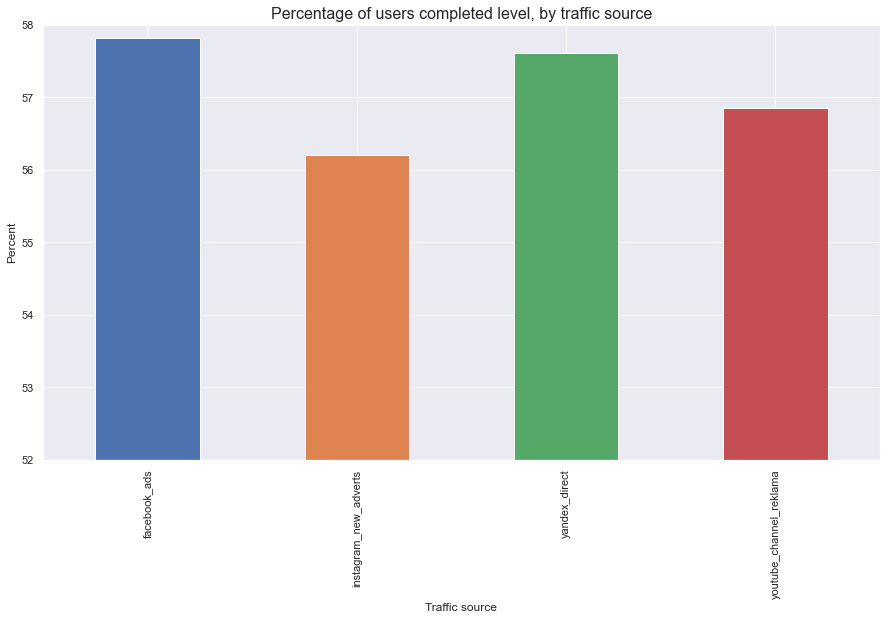

In [365]:
incomplete_source = users_compl_incomp.pivot_table(index='source',columns='fin_type',values='days_spent',aggfunc='count')
incomplete_source[1] = incomplete_source[0]+incomplete_source[1]
incomplete_source = incomplete_source.rename(columns = {1:'total', 0:'incomplete'})
incomplete_source = (incomplete_source['incomplete']/incomplete_source['total'])*100

incomplete_source.plot(kind='bar', ylim=[52,58],color=['C0','C1','C2','C3'])
plt.title('Percentage of users completed level, by traffic source', fontsize=16)
plt.xlabel('Traffic source')
plt.ylabel('Percent');

In [366]:
def groups_difference (group_1, group_2, alpha):
    
    leads = [group_1.count(),group_2.count()]
    purchases = [group_1.sum(),group_2.sum()]    
    
    
    p1 = purchases[0]/leads[0]  # the proportion of successes in the first group

    p2 = purchases[1]/leads[1] # the proportion of successes in the second group

    p_combined = (purchases[0] + purchases[1]) / (leads[0] + leads[1]) # proportion of successes in the combined dataset

    difference = p1 - p2  # difference in proportions in datasets

    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/leads[0] + 1/leads[1]))

    distr = st.norm(0, 1) #standard normal distribution (mean 0, standard deviation 1)

    p_value = p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('The first group: %.3f' % p1,' The second group: %.3f' % p2,' Difference: %.3f' % -difference)
    print('p-value: ', p_value)

    if p_value < alpha:
        print("Rejecting the null hypothesis")
    else:
        print("Can not reject the null hypothesis")   
        
        

In [367]:
sample_Fb = users_compl_incomp.query(" source == 'facebook_ads'")['fin_type'].copy()
sample_In = users_compl_incomp.query(" source == 'instagram_new_adverts'")['fin_type'].copy()
sample_Ya = users_compl_incomp.query(" source == 'yandex_direct'")['fin_type'].copy()
sample_Yt = users_compl_incomp.query(" source == 'youtube_channel_reklama'")['fin_type'].copy()

Since there are 4 comparing groups, in order to make all possible comparisons a Bonferroni correction must be applied reducing the required level of significance by a factor of 6.

In [368]:
print('Fb / Inst')
groups_difference(sample_Fb, sample_In, 0.05/6)
print('\n')

print('Fb / Ya')
groups_difference(sample_Fb, sample_Ya, 0.05/6)
print('\n')

print('Fb / Yt')
groups_difference(sample_Fb, sample_Yt, 0.05/6)
print('\n')

print('Ins / Ya')
groups_difference(sample_In, sample_Ya, 0.05/6)
print('\n')

print('Ins / Yt')
groups_difference(sample_In, sample_Yt, 0.05/6)
print('\n')

print('Yt / Ya')
groups_difference(sample_Yt, sample_Ya, 0.05/6)
print('\n')
    

Fb / Inst
The first group: 0.422  The second group: 0.438  Difference: 0.016
p-value:  0.20644137086490777
Can not reject the null hypothesis


Fb / Ya
The first group: 0.422  The second group: 0.424  Difference: 0.002
p-value:  0.8624388026512437
Can not reject the null hypothesis


Fb / Yt
The first group: 0.422  The second group: 0.431  Difference: 0.010
p-value:  0.4737412931629539
Can not reject the null hypothesis


Ins / Ya
The first group: 0.438  The second group: 0.424  Difference: -0.014
p-value:  0.20595754565724533
Can not reject the null hypothesis


Ins / Yt
The first group: 0.438  The second group: 0.431  Difference: -0.007
p-value:  0.6123664865502236
Can not reject the null hypothesis


Yt / Ya
The first group: 0.431  The second group: 0.424  Difference: -0.008
p-value:  0.5244230207169549
Can not reject the null hypothesis




#### Conclusion

* In the dynamics of the first level completion analysis section we determined that there is no difference between players acquired through different sources. The hypothesis testing confirmed this.
* The difference in the first level completion speed among players acquired through the different sources is less than one percent.

## Final conclusion

* The following steps were done in preparation for the analysis:
    * A preliminary review of the collected data 
    * Duplicated events were removed
    * A user table was created and filled with summary data
       
* During the data review the following was found:
    * Period of the marketing campaign: *3 — 9 of May 2020*
    * Unique users acquired: *13576*
    * Users acquisition sources:
        * *Facebook ads*
        * *Yandex Direct*
        * *YouTube Channel*
        * *Instagram Adverts*
    * Period of the first game sessions:  *4  — 10 May 2020*
    * Period of the in-game activity: *4 May — 5 June 2020*
  
   
* Players profiles analysis highlights:    
    * No difference was found in the behavior of the users acquired from different traffic sources.
    * Players who choose completing the first level through the fight with an enemy spend less days in the game than users who choose the project development. The difference is *18%*.
    * About 57% of players do not complete the first level. 
    * And about 67% of the users completed the first level choose the fighting with an enemy.
    * Players who choose the project development built *10 buildings* and more. 
    * There is also a visible drop in the number of users who built exactly *7 buildings*. There is no obvious reason for that according to the provided data. Should be discussed with the developers team.
    * Users who completed the first level spent, on average, more days in the game than others. 
    * On average users complete the first level in *10-12 days*.
    * Non-completers spend in the game *9 days* on average.
    * The difference in time spent in the game for completed the first level users and  non-completers is *22.4%*
    * The first level completion speed difference for users acquired from different traffic sources is *less than 1%*.     
    
* The marketing campaign results analysis highlights: 
    * The most users were acquired through Yandex Direct.
    * The second biggest part of the users — through Instagram.
    * Ads in YouTube and Facebook acquired an equal amount of new users. 
    * The cheapest user acquisition is through YouTube.
    * The average acquisition cost does not change in time and is:
        * Facebook — 0.78 monetary units
        * Instagram — 0.65 monetary units
        * Yandex Direct — 0.46 monetary units
        * YouTube — 0.4 monetary units.
    * The percentage of the first level completion does not depend on the traffic source.
    * The amount of the acquired users lowers by the end of the marketing campaign which increases the noise.
       
       
**Recommendations**        
* As the same amount of money was invested in advertising on Facebook, Instagram and Yandex Direct, but more users came through the latter, this lowered the average cost per player through Yandex Direct (0.46 m.u. versus 0.65 for Instagram and 0.78 for Facebook). At the same time user behaviour from different sources does not differ significantly. Therefore, it makes sense to focus on advertising through Yandex Direct.
* It is also worth attracting attention of the development and game design departments to the drop in the number of users who have built exactly 7 buildings in the game.
* Since about 57% of users do not complete the first level, it is worth discussing with the game design department the possibility of improving onboarding for the new players or adjusting the difficulty of the first level.